In [1]:
import numpy as np 
import pandas as pd 
import os
from time import time
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
%matplotlib inline
le = preprocessing.LabelEncoder()
from numba import jit
import itertools
from seaborn import countplot,lineplot, barplot
from numba import jit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.style as style 
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
import gc
gc.enable()


In [2]:
data = pd.read_csv('/kaggle/input/career-con-2019/X_train.csv')
tr = pd.read_csv('/kaggle/input/career-con-2019/X_train.csv')
sub = pd.read_csv('/kaggle/input/career-con-2019/sample_submission.csv')
test = pd.read_csv('/kaggle/input/career-con-2019/X_test.csv')
target = pd.read_csv('/kaggle/input/career-con-2019/y_train.csv')
print ("Data is ready !!")

Data is ready !!


In [3]:
data.head(130)

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0      0_0          0                   0       -0.75853       -0.63435   
1      0_1          0                   1       -0.75853       -0.63434   
2      0_2          0                   2       -0.75853       -0.63435   
3      0_3          0                   3       -0.75852       -0.63436   
4      0_4          0                   4       -0.75852       -0.63435   
..     ...        ...                 ...            ...            ...   
125  0_125          0                 125       -0.75949       -0.63309   
126  0_126          0                 126       -0.75950       -0.63307   
127  0_127          0                 127       -0.75953       -0.63306   
128    1_0          1                   0       -0.95896        0.24074   
129    1_1          1                   1       -0.95890        0.24079   

     orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0        -0.104880       -0.10597            0.107650            0.017561   
1        -0.104900       -0.10600            0.067851            0.029939   
2        -0.104920       -0.10597            0.007275            0.028934   
3        -0.104950       -0.10597           -0.013053            0.019448   
4        -0.104950       -0.10596            0.005135            0.007652   
..             ...            ...                 ...                 ...   
125      -0.104670       -0.10690           -0.083083           -0.044480   
126      -0.104640       -0.10693           -0.001305           -0.031012   
127      -0.104610       -0.10684            0.073856            0.020353   
128       0.030758       -0.14661            0.283420            0.002192   
129       0.030786       -0.14693            0.108930           -0.009485   

     angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0              0.000767               -0.74857                2.10300   
1              0.003386                0.33995                1.50640   
2             -0.005978               -0.26429                1.59220   
3             -0.008974                0.42684                1.09930   
4              0.005245               -0.50969                1.46890   
..                  ...                    ...                    ...   
125            0.031726               -0.98193                0.97328   
126            0.017241               -0.72591                0.34931   
127            0.018466               -0.53426                0.80346   
128           -0.050810                2.18480                2.25260   
129            0.009155                0.49905                2.97620   

     linear_acceleration_Z  
0                  -9.7532  
1                  -9.4128  
2                  -8.7267  
3                 -10.0960  
4                 -10.4410  
..                     ...  
125                -9.9795  
126               -11.9770  
127               -10.6970  
128                -8.9503  
129                -5.4953  

[130 rows x 13 columns]

In [4]:
data.shape

(487680, 13)

In [5]:
data.nunique()

row_id                   487680
series_id                  3810
measurement_number          128
orientation_X            163952
orientation_Y            151162
orientation_Z            134570
orientation_W            140660
angular_velocity_X       162043
angular_velocity_Y       151146
angular_velocity_Z       201611
linear_acceleration_X    241824
linear_acceleration_Y    119967
linear_acceleration_Z     74443
dtype: int64

In [6]:
test.head()

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0        0.91208       -0.38193   
1    0_1          0                   1        0.91220       -0.38165   
2    0_2          0                   2        0.91228       -0.38143   
3    0_3          0                   3        0.91237       -0.38121   
4    0_4          0                   4        0.91247       -0.38096   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0      -0.050618        0.14028           -0.060205            0.071286   
1      -0.050573        0.14028           -0.033486            0.060210   
2      -0.050586        0.14032           -0.029686            0.029476   
3      -0.050588        0.14035           -0.024217            0.037788   
4      -0.050546        0.14042           -0.038047            0.083405   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            -0.18787                0.29492                 2.8027   
1            -0.18206                0.14944                 2.5408   
2            -0.18441               -0.49741                 2.5853   
3            -0.18783               -0.32376                 2.9966   
4            -0.20170               -0.70103                 2.6498   

   linear_acceleration_Z  
0                -9.6816  
1                -9.8521  
2                -9.3835  
3                -8.7415  
4                -8.8432

In [7]:
data.describe()

series_id  measurement_number  orientation_X  orientation_Y  \
count  487680.000000       487680.000000  487680.000000  487680.000000   
mean     1904.500000           63.500000      -0.018050       0.075062   
std      1099.853353           36.949327       0.685696       0.708226   
min         0.000000            0.000000      -0.989100      -0.989650   
25%       952.000000           31.750000      -0.705120      -0.688980   
50%      1904.500000           63.500000      -0.105960       0.237855   
75%      2857.000000           95.250000       0.651803       0.809550   
max      3809.000000          127.000000       0.989100       0.988980   

       orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
count  487680.000000  487680.000000       487680.000000       487680.000000   
mean        0.012458      -0.003804            0.000178            0.008338   
std         0.105972       0.104299            0.117764            0.088677   
min        -0.162830      -0.156620           -2.371000           -0.927860   
25%        -0.089466      -0.106060           -0.040752           -0.033191   
50%         0.031949      -0.018704            0.000084            0.005412   
75%         0.122870       0.097215            0.040527            0.048068   
max         0.155710       0.154770            2.282200            1.079100   

       angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
count       487680.000000          487680.000000          487680.000000   
mean            -0.019184               0.129281               2.886468   
std              0.229153               1.870600               2.140067   
min             -1.268800             -36.067000            -121.490000   
25%             -0.090743              -0.530833               1.957900   
50%             -0.005335               0.124980               2.879600   
75%              0.064604               0.792262               3.798800   
max              1.387300              36.797000              73.008000   

       linear_acceleration_Z  
count          487680.000000  
mean               -9.364886  
std                 2.845341  
min               -75.386000  
25%               -10.193000  
50%                -9.365300  
75%                -8.522700  
max                65.839000

In [8]:
test.describe()

series_id  measurement_number  orientation_X  orientation_Y  \
count  488448.000000       488448.000000  488448.000000  488448.000000   
mean     1907.500000           63.500000       0.031996       0.120651   
std      1101.585403           36.949327       0.671977       0.714522   
min         0.000000            0.000000      -0.989720      -0.989810   
25%       953.750000           31.750000      -0.648130      -0.744503   
50%      1907.500000           63.500000       0.132910       0.397860   
75%      2861.250000           95.250000       0.575270       0.803600   
max      3815.000000          127.000000       0.989320       0.988940   

       orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
count  488448.000000  488448.000000       488448.000000       488448.000000   
mean        0.018735       0.004024            0.000401            0.013669   
std         0.108481       0.100957            0.114485            0.089440   
min        -0.154680      -0.156270           -2.403300           -1.193000   
25%        -0.112660      -0.098434           -0.037396           -0.029865   
50%         0.057271       0.022654            0.001107            0.007276   
75%         0.124770       0.083706            0.037827            0.051112   
max         0.154250       0.152510            3.396600            1.150700   

       angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
count       488448.000000          488448.000000          488448.000000   
mean            -0.036101               0.125433               2.906588   
std              0.233791               1.832639               2.094727   
min             -1.458200             -35.040000            -107.480000   
25%             -0.089843              -0.486233               2.052100   
50%             -0.008911               0.112490               2.900300   
75%              0.057876               0.727250               3.758000   
max              0.960280              36.628000              55.624000   

       linear_acceleration_Z  
count          488448.000000  
mean               -9.359811  
std                 2.802670  
min               -83.173000  
25%               -10.125000  
50%                -9.361700  
75%                -8.582075  
max                59.633000

In [9]:
data.isnull().sum()

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64

In [10]:
test.isnull().sum()

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64

In [11]:
target.head()

series_id  group_id        surface
0          0        13  fine_concrete
1          1        31       concrete
2          2        20       concrete
3          3        31       concrete
4          4        22     soft_tiles

In [12]:
target.nunique()

series_id    3810
group_id       73
surface         9
dtype: int64

In [13]:
target.groupby('group_id').surface.nunique().max()

1

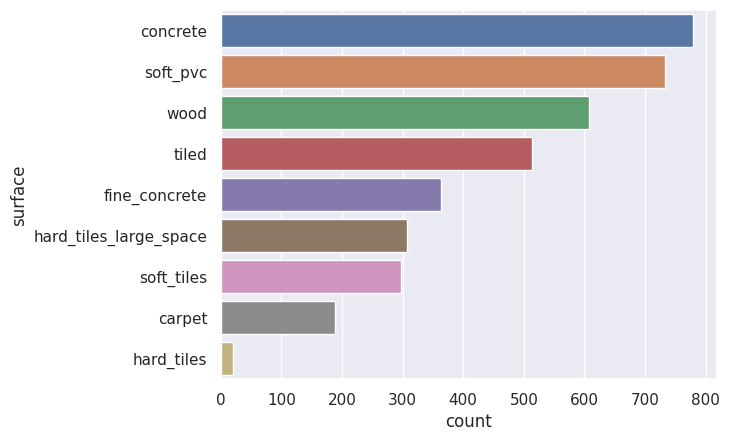

In [14]:
sns.set(style='darkgrid')
sns.countplot(y='surface',
             data= target,
             order = target['surface'].value_counts().index)
plt.show()

Target feature - surface and group_id distribution

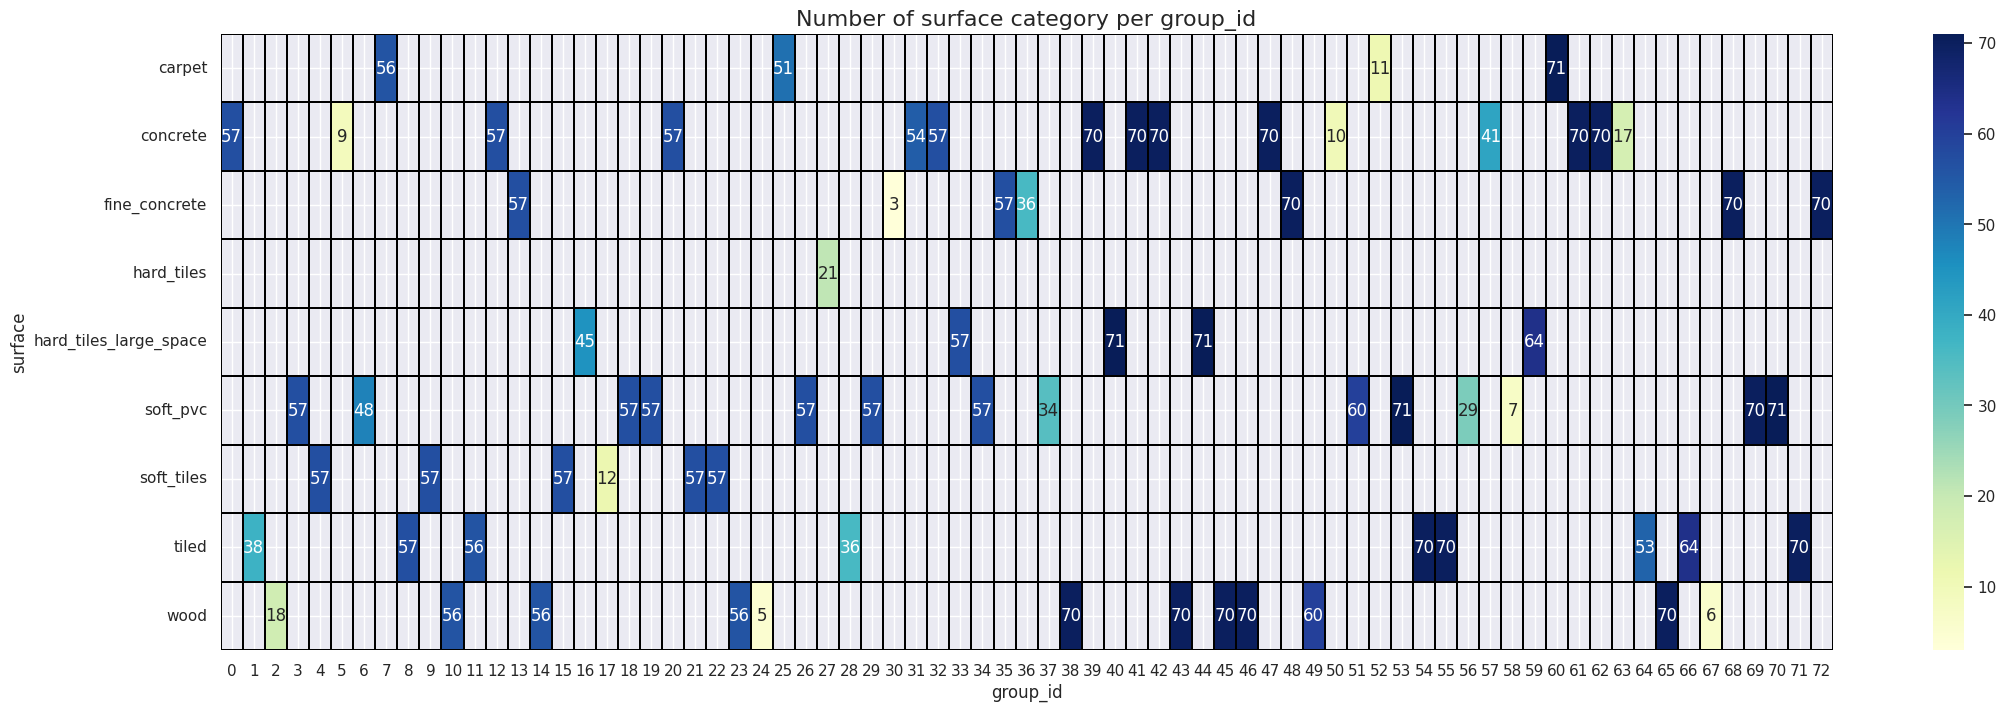

In [15]:
fig, ax = plt.subplots(1,1,figsize=(26,8))
tmp = pd.DataFrame(target.groupby(['group_id', 'surface'])['series_id'].count().reset_index())
m = tmp.pivot(index='surface', columns='group_id', values='series_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of surface category per group_id', size=16)
plt.show()

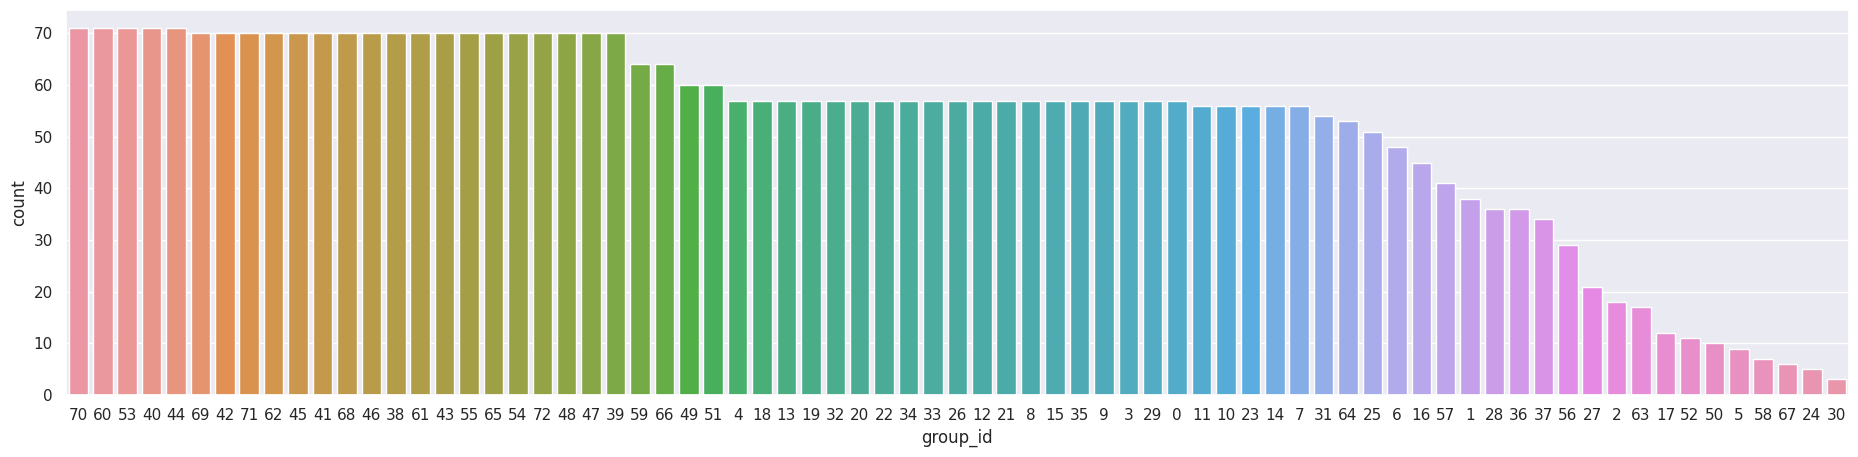

In [16]:
plt.figure(figsize=(23,5)) 
sns.set(style="darkgrid")
countplot(x="group_id", data=target, order = target['group_id'].value_counts().index)
plt.show()

series_id=0

In [17]:
serie1 = tr.head(128)
serie1.head()

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            0.000767               -0.74857                 2.1030   
1            0.003386                0.33995                 1.5064   
2           -0.005978               -0.26429                 1.5922   
3           -0.008974                0.42684                 1.0993   
4            0.005245               -0.50969                 1.4689   

   linear_acceleration_Z  
0                -9.7532  
1                -9.4128  
2                -8.7267  
3               -10.0960  
4               -10.4410

In [18]:
serie1.describe()

series_id  measurement_number  orientation_X  orientation_Y  \
count      128.0          128.000000     128.000000     128.000000   
mean         0.0           63.500000      -0.758666      -0.634008   
std          0.0           37.094474       0.000363       0.000471   
min          0.0            0.000000      -0.759530      -0.634560   
25%          0.0           31.750000      -0.758927      -0.634383   
50%          0.0           63.500000      -0.758530      -0.634270   
75%          0.0           95.250000      -0.758367      -0.633530   
max          0.0          127.000000      -0.758220      -0.633060   

       orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
count     128.000000     128.000000          128.000000          128.000000   
mean       -0.105474      -0.106470           -0.002481           -0.003306   
std         0.000432       0.000389            0.052800            0.031544   
min        -0.106140      -0.107050           -0.160410           -0.079404   
25%        -0.105873      -0.106775           -0.029069           -0.027110   
50%        -0.105500      -0.106555           -0.005082           -0.004037   
75%        -0.105078      -0.106130            0.035803            0.020031   
max        -0.104610      -0.105590            0.107650            0.072698   

       angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
count          128.000000             128.000000             128.000000   
mean             0.007532               0.263418               2.984195   
std              0.017127               0.911175               1.387790   
min             -0.030181              -1.864400               0.075417   
25%             -0.005289              -0.362872               1.791050   
50%              0.006842               0.231665               3.407550   
75%              0.020088               0.905635               4.119200   
max              0.051720               2.853800               5.386400   

       linear_acceleration_Z  
count             128.000000  
mean               -9.320391  
std                 1.095040  
min               -12.512000  
25%                -9.875850  
50%                -9.429950  
75%                -8.633425  
max                -6.268100

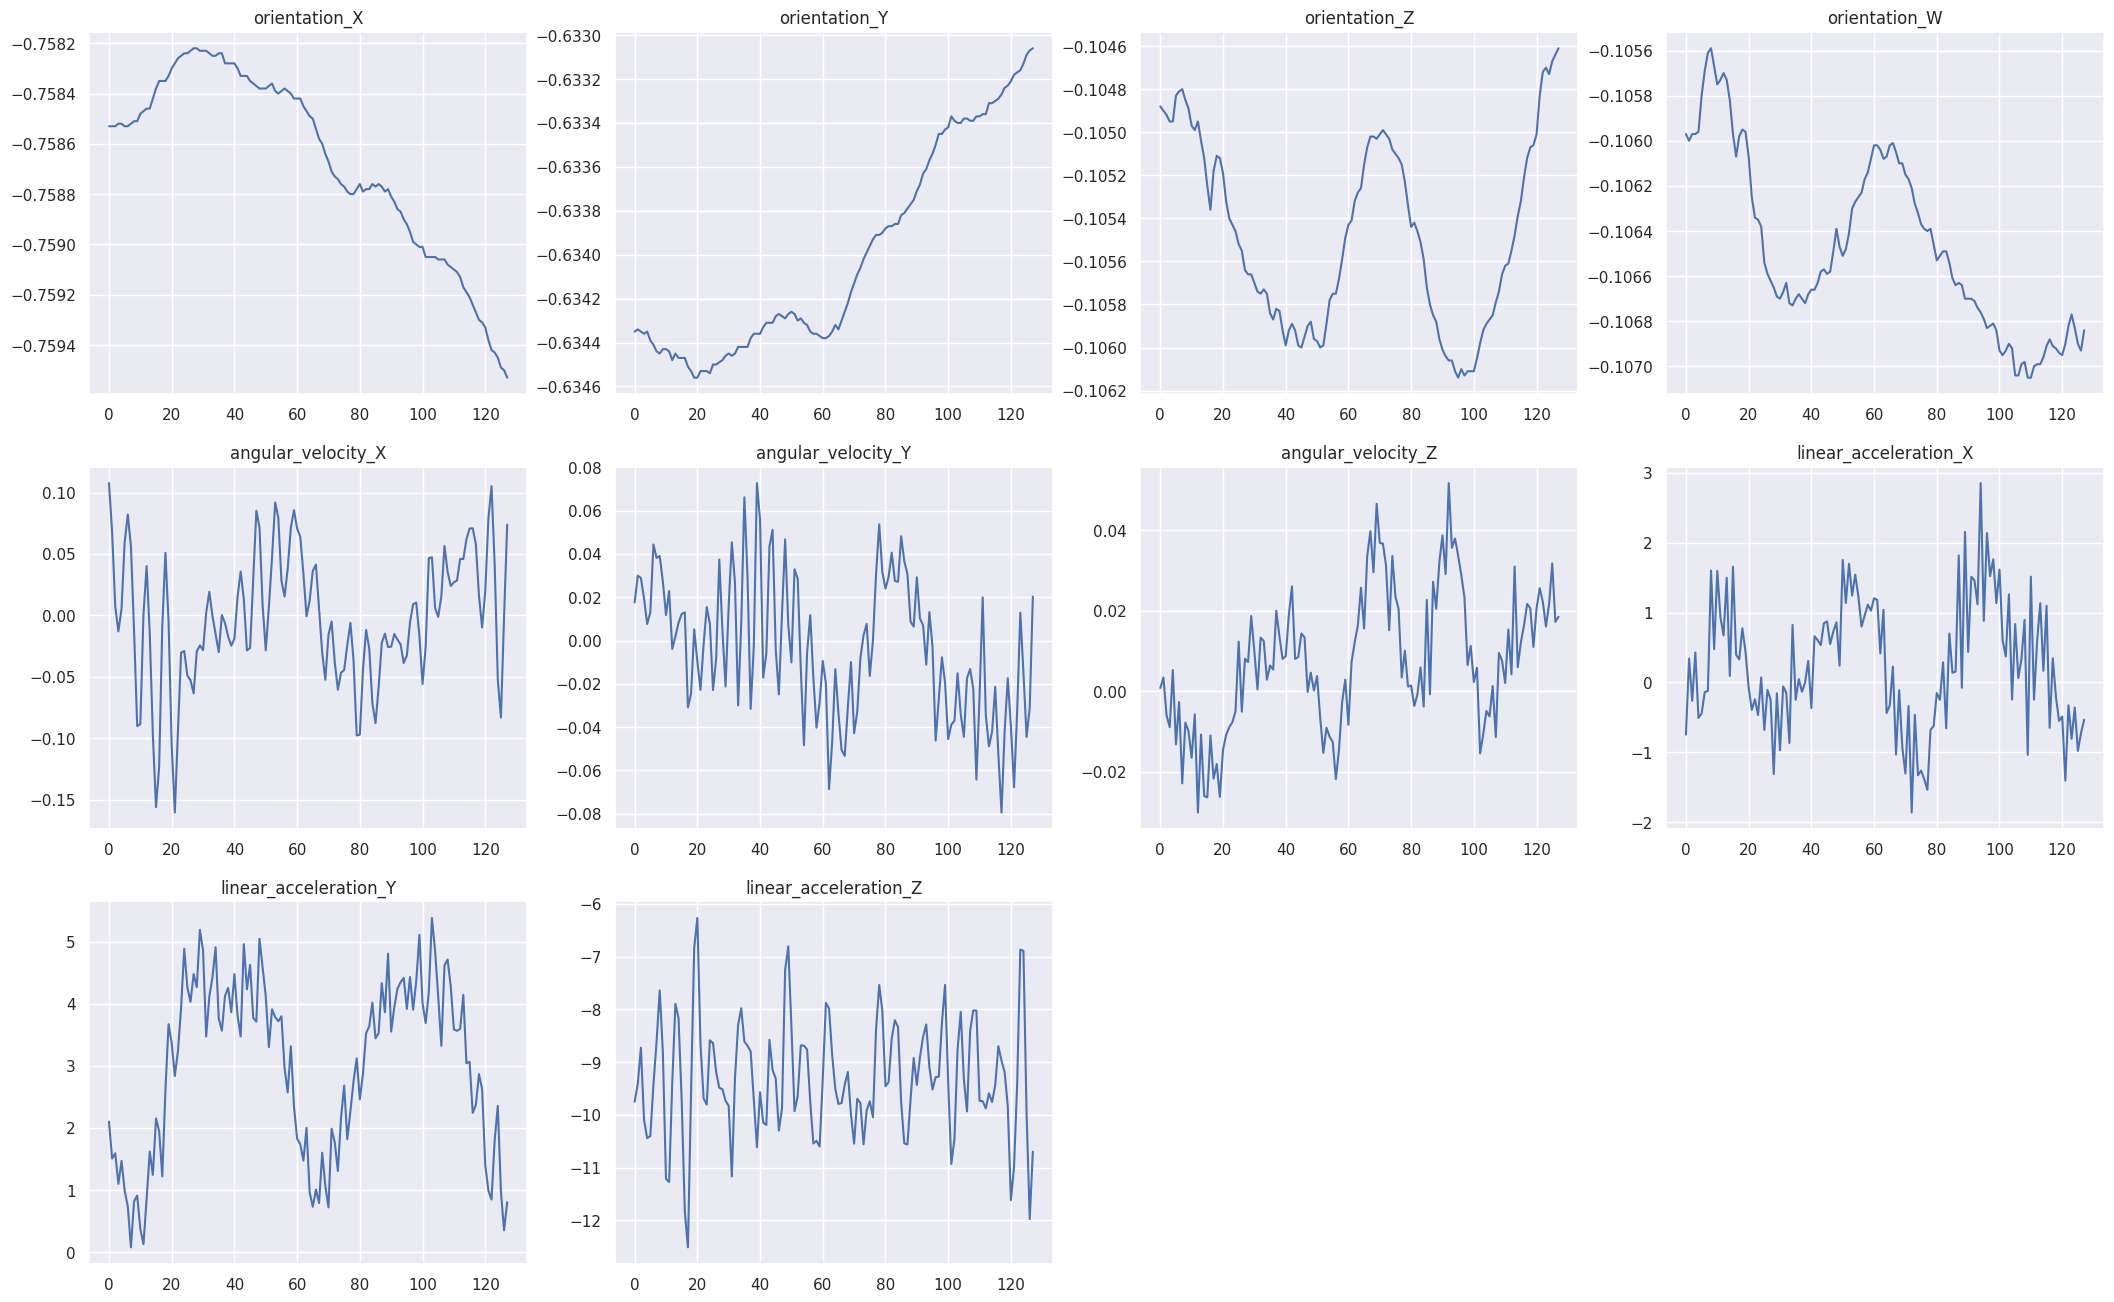

In [19]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(serie1.columns[3:]):
    plt.subplot(3, 4, i + 1)
    plt.plot(serie1[col])
    plt.title(col)


In [20]:
target.head(1)

series_id  group_id        surface
0          0        13  fine_concrete

In [21]:
del serie1
gc.collect()

46875

To visalize any series

In [22]:
series_dict = {}
for series in (data['series_id'].unique()):
    series_dict[series] = data[data['series_id'] == series]  

In [23]:
def plotSeries(series_id):
    style.use('ggplot')
    plt.figure(figsize=(28, 16))
    print(target[target['series_id'] == series_id]['surface'].values[0].title())
    for i, col in enumerate(series_dict[series_id].columns[3:]):
        if col.startswith("o"):
            color = 'red'
        elif col.startswith("a"):
            color = 'green'
        else:
            color = 'blue'
        if i >= 7:
            i+=1
        plt.subplot(3, 4, i + 1)
        plt.plot(series_dict[series_id][col], color=color, linewidth=3)
        plt.title(col)

Carpet


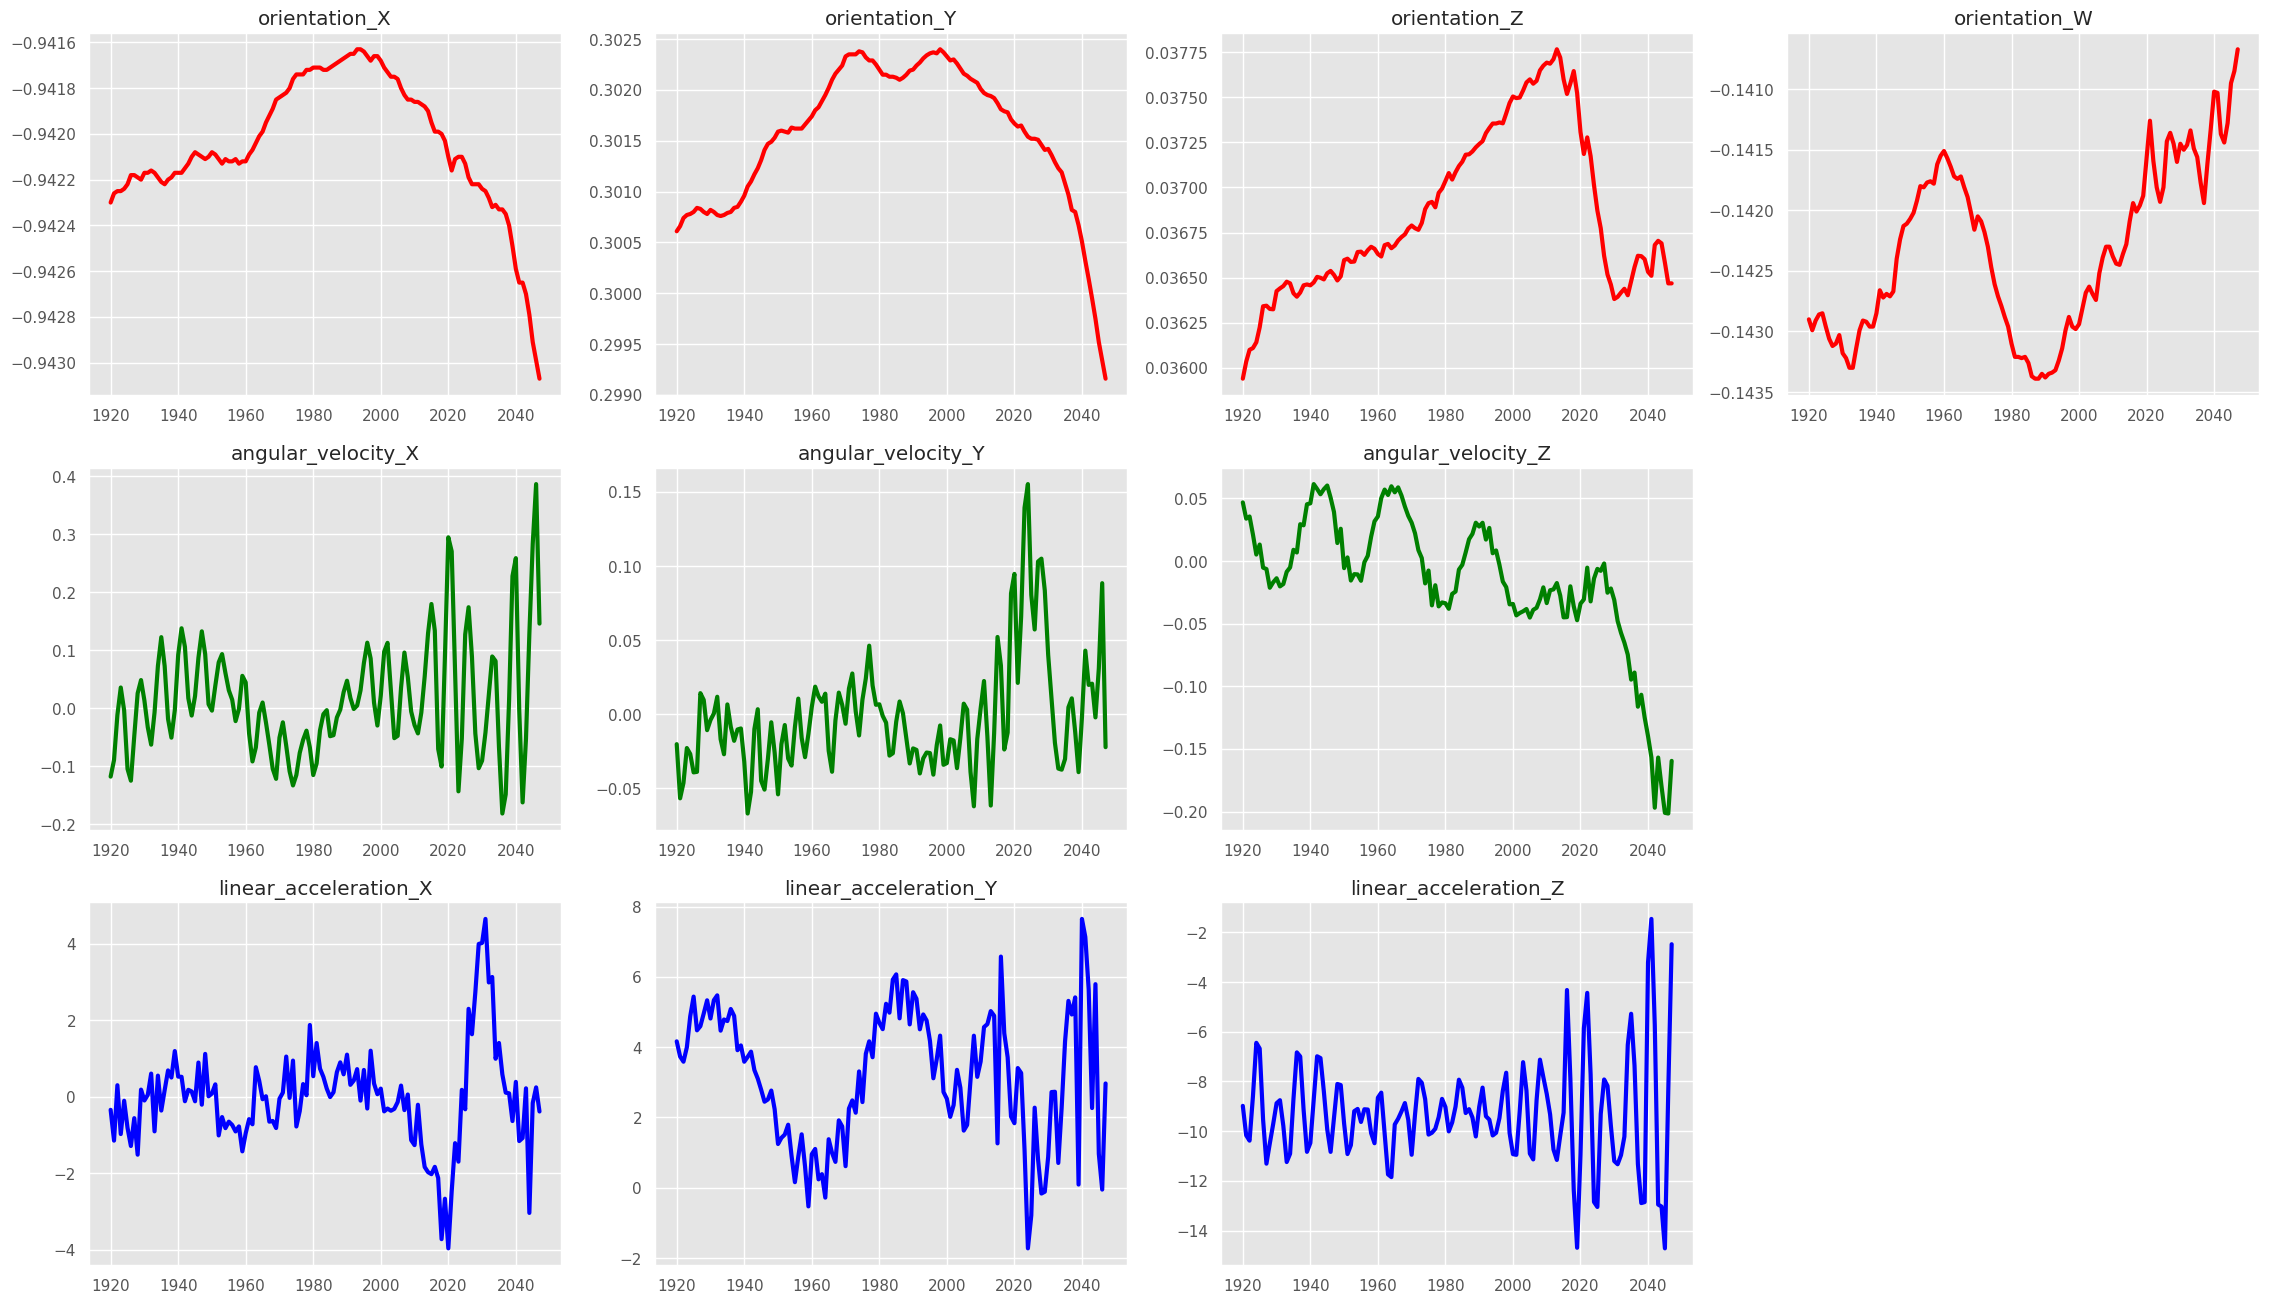

In [24]:
id_series = 15
plotSeries(id_series)

In [25]:
del series_dict
gc.collect()

33026

Correlation

<Axes: >

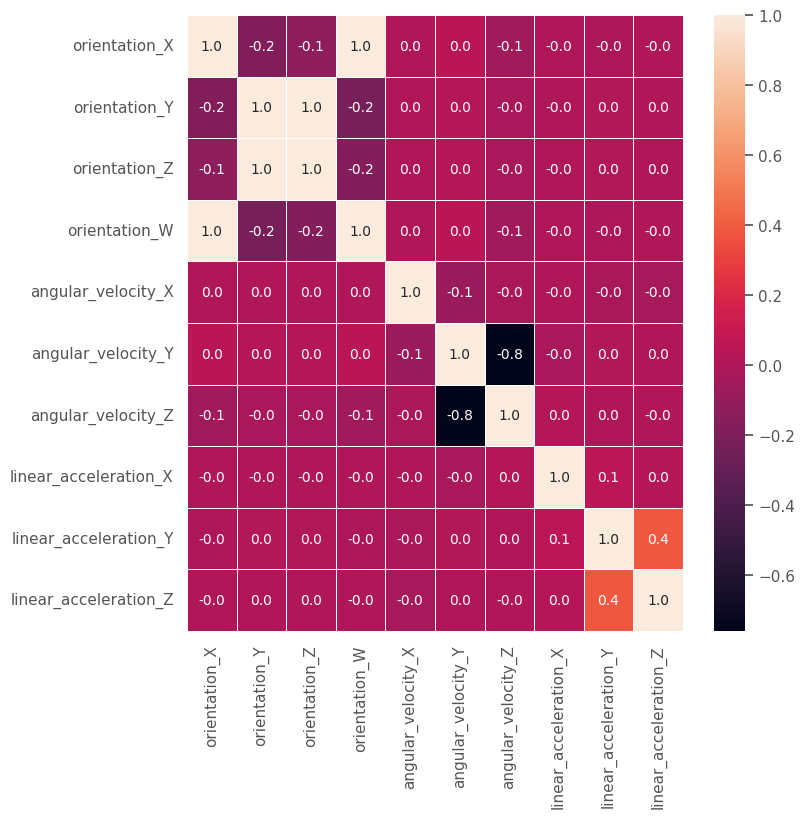

In [26]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(tr.iloc[:,3:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

in above there is a strong relation between: 
* angular_velocity_Z and angular_velocity_Y
* orientation_X and orientation_Y
* orientation_Y and orientation_Z

<Axes: >

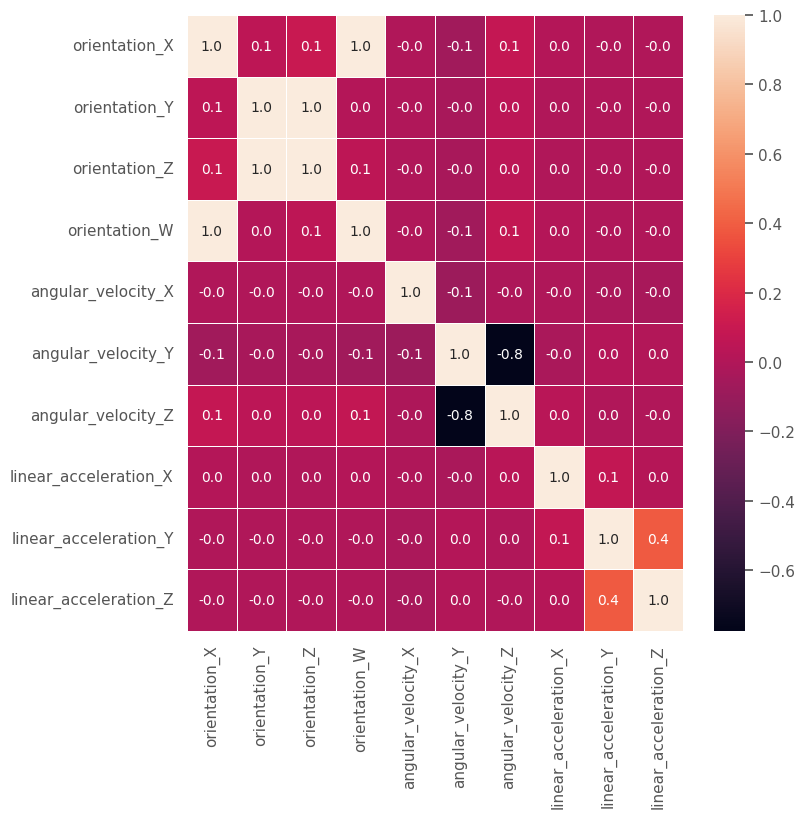

In [27]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(test.iloc[:,3:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Fourier Analysis

In [28]:
train_x = pd.read_csv('/kaggle/input/career-con-2019/X_train.csv')
train_y = pd.read_csv('/kaggle/input/career-con-2019/y_train.csv')

In [29]:
import math

def prepare_data(t):
    def f(d):
        d = d.sort_values(by=['measurement_number'])
        return pd.DataFrame({
         'lx':[ d['linear_acceleration_X'].values ],
         'ly':[ d['linear_acceleration_Y'].values ],
         'lz':[ d['linear_acceleration_Z'].values ],
         'ax':[ d['angular_velocity_X'].values ],
         'ay':[ d['angular_velocity_Y'].values ],
         'az':[ d['angular_velocity_Z'].values ],
        })
    t = t.groupby('series_id').apply(f)
    
    def mfft(x):
        return [x/math.sqrt(128.0) for x in np.absolute(np.fft.fft(x))][1:65]
    
    t['lx_f']=[ mfft(x) for x in t['lx'].values ]
    t['ly_f']=[ mfft(x) for x in t['ly'].values ]
    t['lz_f']=[ mfft(x) for x in t['lz'].values ]
    t['ax_f']=[ mfft(x) for x in t['ax'].values ]
    t['ay_f']=[ mfft(x) for x in t['ay'].values ]
    t['az_f']=[ mfft(x) for x in t['az'].values ]
    return t

In [30]:
t=prepare_data(train_x)
t=pd.merge(t,train_y[['series_id','surface','group_id']],on='series_id')
t=t.rename(columns={"surface": "y"})

In [31]:
t.head()

series_id                                                 lx  \
0          0  [-0.74857, 0.33995, -0.26429, 0.42684, -0.5096...   
1          1  [2.1848, 0.49905, 0.74827, 1.8408, -0.49667, 2...   
2          2  [0.39932, 1.1902, 1.3149, 0.40443, 1.8533, 0.1...   
3          3  [0.60248, 1.3318, -1.6049, 2.5962, -1.1193, -0...   
4          4  [-0.13289, -0.046856, -0.027218, 0.32558, 0.55...   

                                                  ly  \
0  [2.103, 1.5064, 1.5922, 1.0993, 1.4689, 0.9928...   
1  [2.2526, 2.9762, 1.6803, 0.22349, -0.92942, 0....   
2  [3.6066, 3.5728, 3.098, 2.3558, 3.1207, 3.6333...   
3  [1.7016, -3.1467, -4.6068, -0.82288, 1.0417, 0...   
4  [3.1301, 3.4042, 3.6543, 3.8225, 3.2718, 2.690...   

                                                  lz  \
0  [-9.7532, -9.4128, -8.7267, -10.096, -10.441, ...   
1  [-8.9503, -5.4953, -7.3061, -11.491, -12.298, ...   
2  [-5.7442, -7.2414, -10.577, -12.499, -11.372, ...   
3  [-7.1944, -16.964, -18.329, -10.072, -1.9426, ...   
4  [-9.8091, -9.9991, -9.6476, -9.3566, -9.8479, ...   

                                                  ax  \
0  [0.10765, 0.067851, 0.0072747, -0.013053, 0.00...   
1  [0.28342, 0.10893, -0.073197, -0.064979, 0.077...   
2  [-0.0067517, -0.12392, -0.15271, -0.059879, 0....   
3  [-0.32689, -0.093026, 0.35138, 0.51913, 0.2170...   
4  [0.025631, 0.062175, 0.072315, 0.053529, 0.043...   

                                                  ay  \
0  [0.017561, 0.029939, 0.028934, 0.019448, 0.007...   
1  [0.002192, -0.0094846, 0.0039592, 0.068265, 0....   
2  [-0.026183, -0.061998, 0.023977, 0.041595, -0....   
3  [0.070941, 0.035097, -0.09083, -0.059721, 0.02...   
4  [0.048867, 0.055693, 0.044909, 0.035106, 0.047...   

                                                  az  \
0  [0.00076741, 0.0033855, -0.0059783, -0.0089735...   
1  [-0.05081, 0.0091553, -0.023384, 0.018673, 0.0...   
2  [0.08873, 0.068301, 0.072925, 0.038059, 0.0494...   
3  [-0.065173, -0.035404, -0.016683, -0.032575, 0...   
4  [-0.12252, -0.11743, -0.10445, -0.090536, -0.0...   

                                                lx_f  \
0  [0.7323655933527661, 2.3564174412525367, 5.034...   
1  [0.8860536466703967, 2.230157644988597, 2.2449...   
2  [0.2336100535610273, 0.8475603049430522, 0.749...   
3  [0.42459683197864506, 1.515594096683768, 3.141...   
4  [0.8509110842885529, 0.9760993199828639, 2.167...   

                                                ly_f  \
0  [2.178121669077444, 9.72768317494082, 0.081211...   
1  [1.92678827921203, 11.76099176768106, 4.260899...   
2  [1.5014727077961352, 8.423985807333567, 3.5923...   
3  [4.738176212541659, 29.008985848501986, 0.3824...   
4  [1.0569691424150336, 8.172367005281263, 1.5882...   

                                                lz_f  \
0  [0.535765834471836, 1.2133557564556197, 0.4924...   
1  [0.373287644346876, 1.0814088189569695, 0.8832...   
2  [0.20264932416593207, 0.8223492842064279, 0.59...   
3  [1.5038964976606017, 3.6471098028454323, 0.729...   
4  [0.20601880853984428, 0.8594134880288526, 0.98...   

                                                ax_f  \
0  [0.029043389726877963, 0.2774005446845322, 0.0...   
1  [0.0644889732067336, 0.35446581260462373, 0.12...   
2  [0.015577196458052896, 0.27741425300815625, 0....   
3  [0.1517588272122234, 0.8638422191111096, 0.054...   
4  [0.0493992850861277, 0.26423659669559235, 0.05...   

                                                ay_f  \
0  [0.06473938550693951, 0.09593949886747424, 0.1...   
1  [0.017099471663232495, 0.055758906618587324, 0...   
2  [0.028428713517119255, 0.0249666251644592, 0.0...   
3  [0.03392177094592639, 0.07012593214589082, 0.0...   
4  [0.04518133126558137, 0.05218290148624584, 0.0...   

                                                az_f              y  group_id  
0  [0.06490234862796104, 0.012386444179419276, 0....  fine_concrete        13  
1  [0.023275392433502885, 0.02486485340511924, 0....       concrete   

In [32]:
def aggf(d, feature):
    va= np.array(d[feature].tolist())
    mean= sum(va)/va.shape[0]
    var= sum([ (va[i,:]-mean)**2 for i in range(va.shape[0]) ])/va.shape[0]
    dev= [ math.sqrt(x) for x in var ]
    return pd.DataFrame({
        'mean': [ mean ],
        'dev' : [ dev ],
    })

display={
'hard_tiles_large_space':'r-.',
'concrete':'g-.',
'tiled':'b-.',

'fine_concrete':'r-',
'wood':'g-',
'carpet':'b-',
'soft_pvc':'y-',

'hard_tiles':'r--',
'soft_tiles':'g--',
}

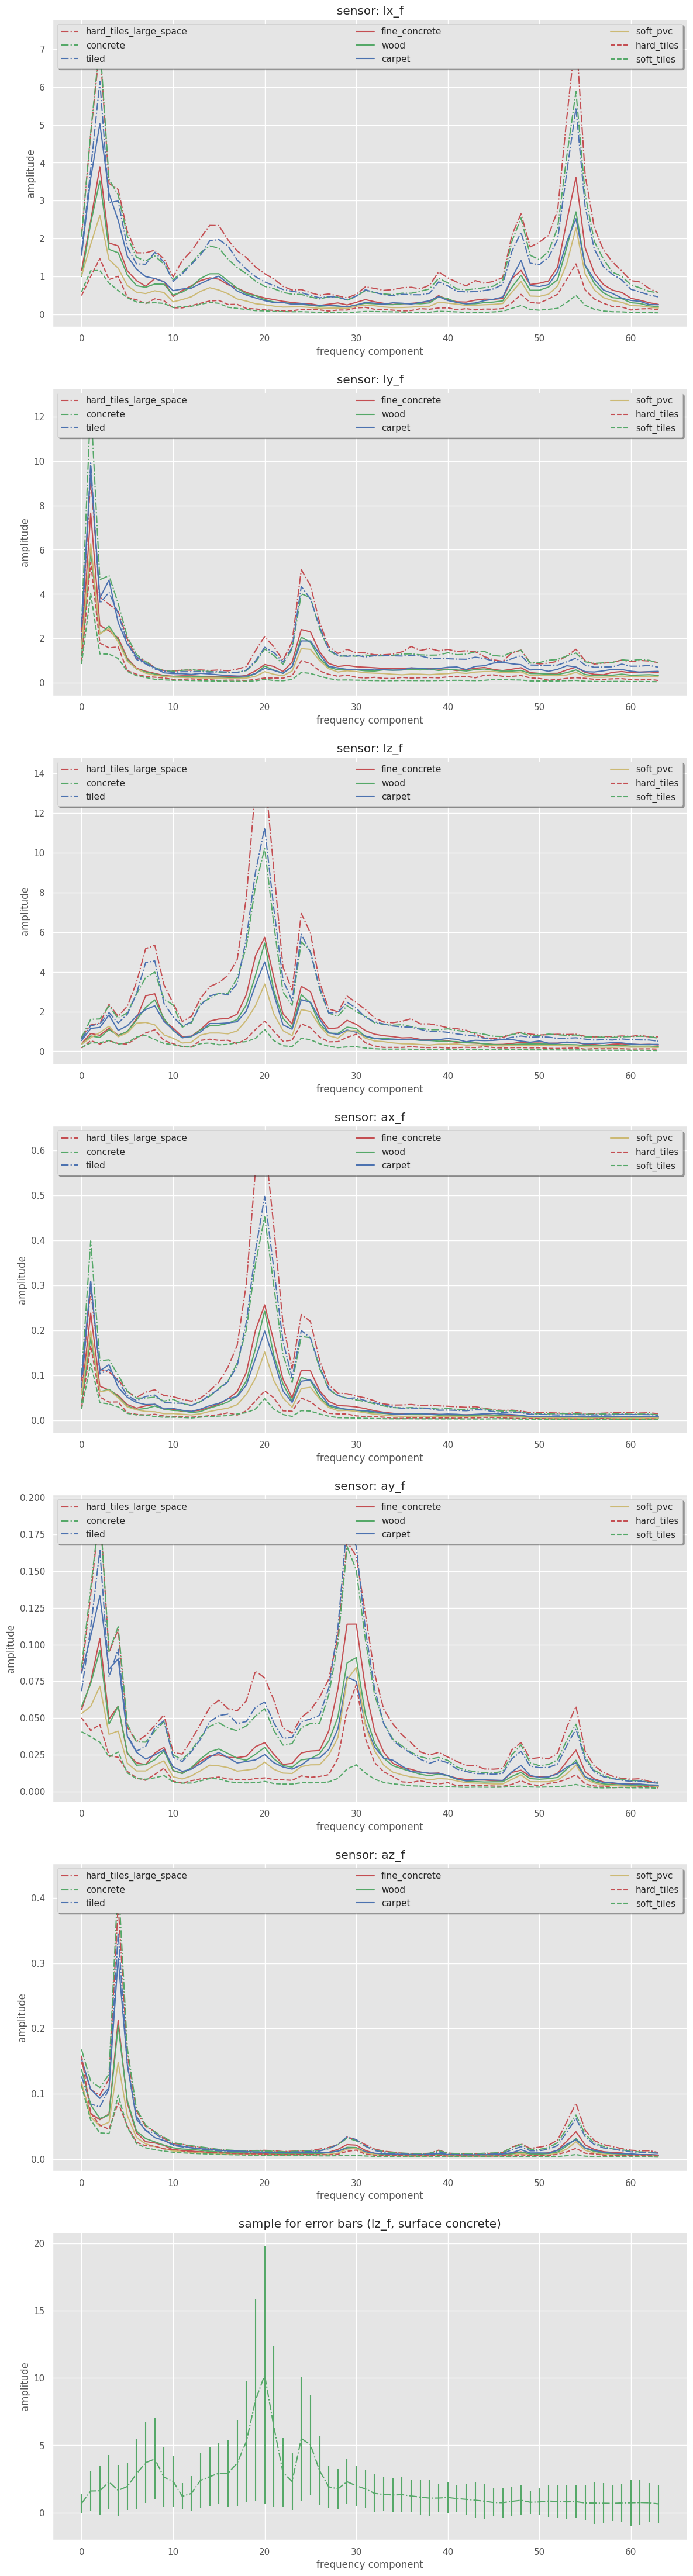

In [33]:
plt.figure(figsize=(14, 8*7))
#plt.margins(x=0.0, y=0.0)
#plt.tight_layout()
# plt.figure()

features=['lx_f','ly_f','lz_f','ax_f','ay_f','az_f']
count=0

for feature in features:
    stat= t.groupby('y').apply(aggf,feature)
    stat.index= stat.index.droplevel(-1)
    b=[*range(len(stat.at['carpet','mean']))]

    count+=1
    plt.subplot(len(features)+1,1,count)
    for i,(k,v) in enumerate(display.items()):
        plt.plot(b, stat.at[k,'mean'], v, label=k)
        # plt.errorbar(b, stat.at[k,'mean'], yerr=stat.at[k,'dev'], fmt=v)
   
    leg = plt.legend(loc='best', ncol=3, mode="expand", shadow=True, fancybox=True)
    plt.title("sensor: " + feature)
    plt.xlabel("frequency component")
    plt.ylabel("amplitude")

count+=1
plt.subplot(len(features)+1,1,count)
k='concrete'
v=display[k]
feature='lz_f'
stat= t.groupby('y').apply(aggf,feature)
stat.index= stat.index.droplevel(-1)
b=[*range(len(stat.at['carpet','mean']))]

plt.errorbar(b, stat.at[k,'mean'], yerr=stat.at[k,'dev'], fmt=v)
plt.title("sample for error bars (lz_f, surface concrete)")
plt.xlabel("frequency component")
plt.ylabel("amplitude")

plt.show()

* We can see: with a frequency 3 Hz we can see an acceleration, I think that acceleration represents one step. Maybe we can suppose that every step is caused by many different movements, that's why there are different accelerations at different frequencies.

* Angular velocity represents spins. Every time the engine/servo spins, the robot does an step - relation between acc y vel.

In [34]:
del train_x, train_y
gc.collect()

20

Feature Engineering

In [35]:
def plot_feature_distribution(df1, df2, label1, label2, features,a=2,b=5):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(a,b,figsize=(17,9))

    for feature in features:
        i += 1
        plt.subplot(a,b,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 640x480 with 0 Axes>

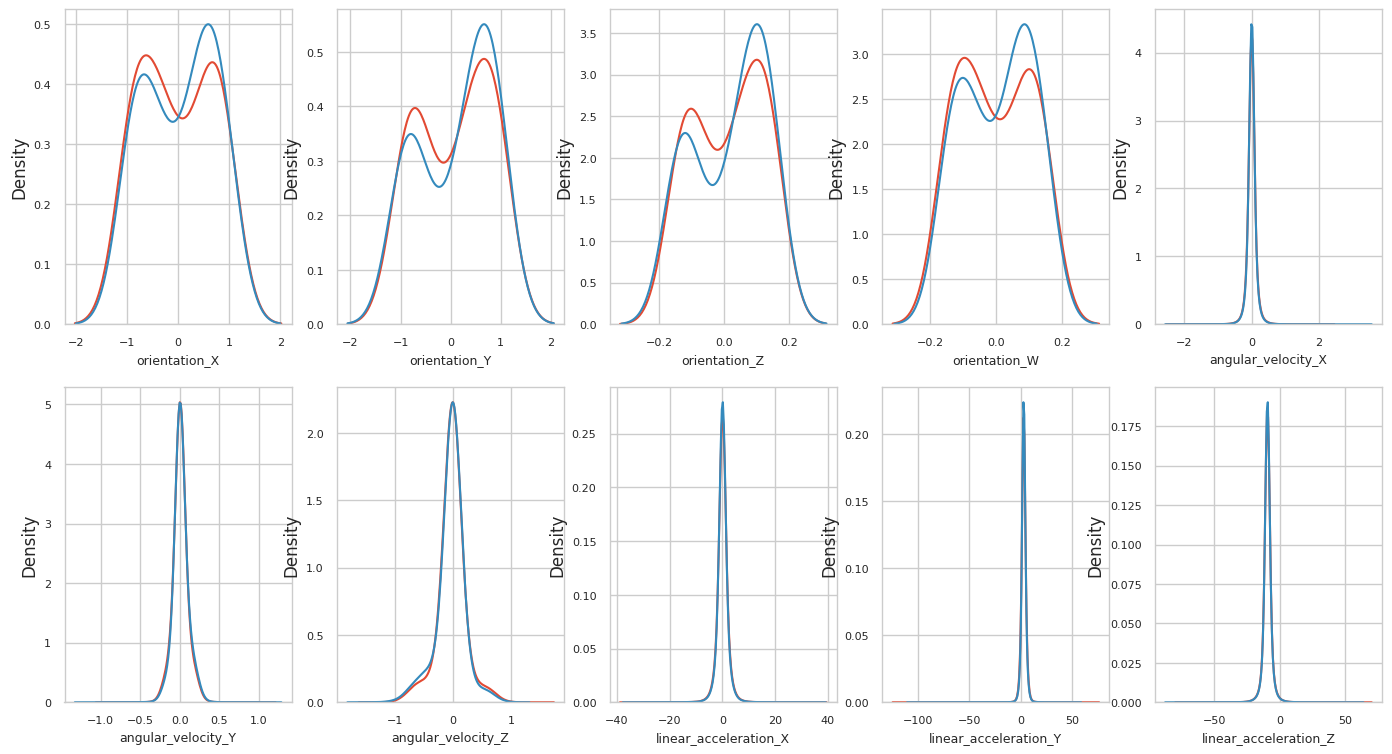

In [36]:
features = data.columns.values[3:]
plot_feature_distribution(data, test, 'train', 'test', features)

our basic features have the same distribution (Normal) on test and training. There are some differences between orientation_X , orientation_Y, orientation_Z and orientation_W.

* will best to try StandardScaler to fix this, and 
* also orientation , angular velocity and linear acceleration are measured with different units, scaling might be a good choice.

In [37]:
def plot_feature_class_distribution(classes,tt, features,a=5,b=2):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(a,b,figsize=(16,24))

    for feature in features:
        i += 1
        plt.subplot(a,b,i)
        for clas in classes:
            ttc = tt[tt['surface']==clas]
            sns.kdeplot(ttc[feature], bw=0.5,label=clas)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 640x480 with 0 Axes>

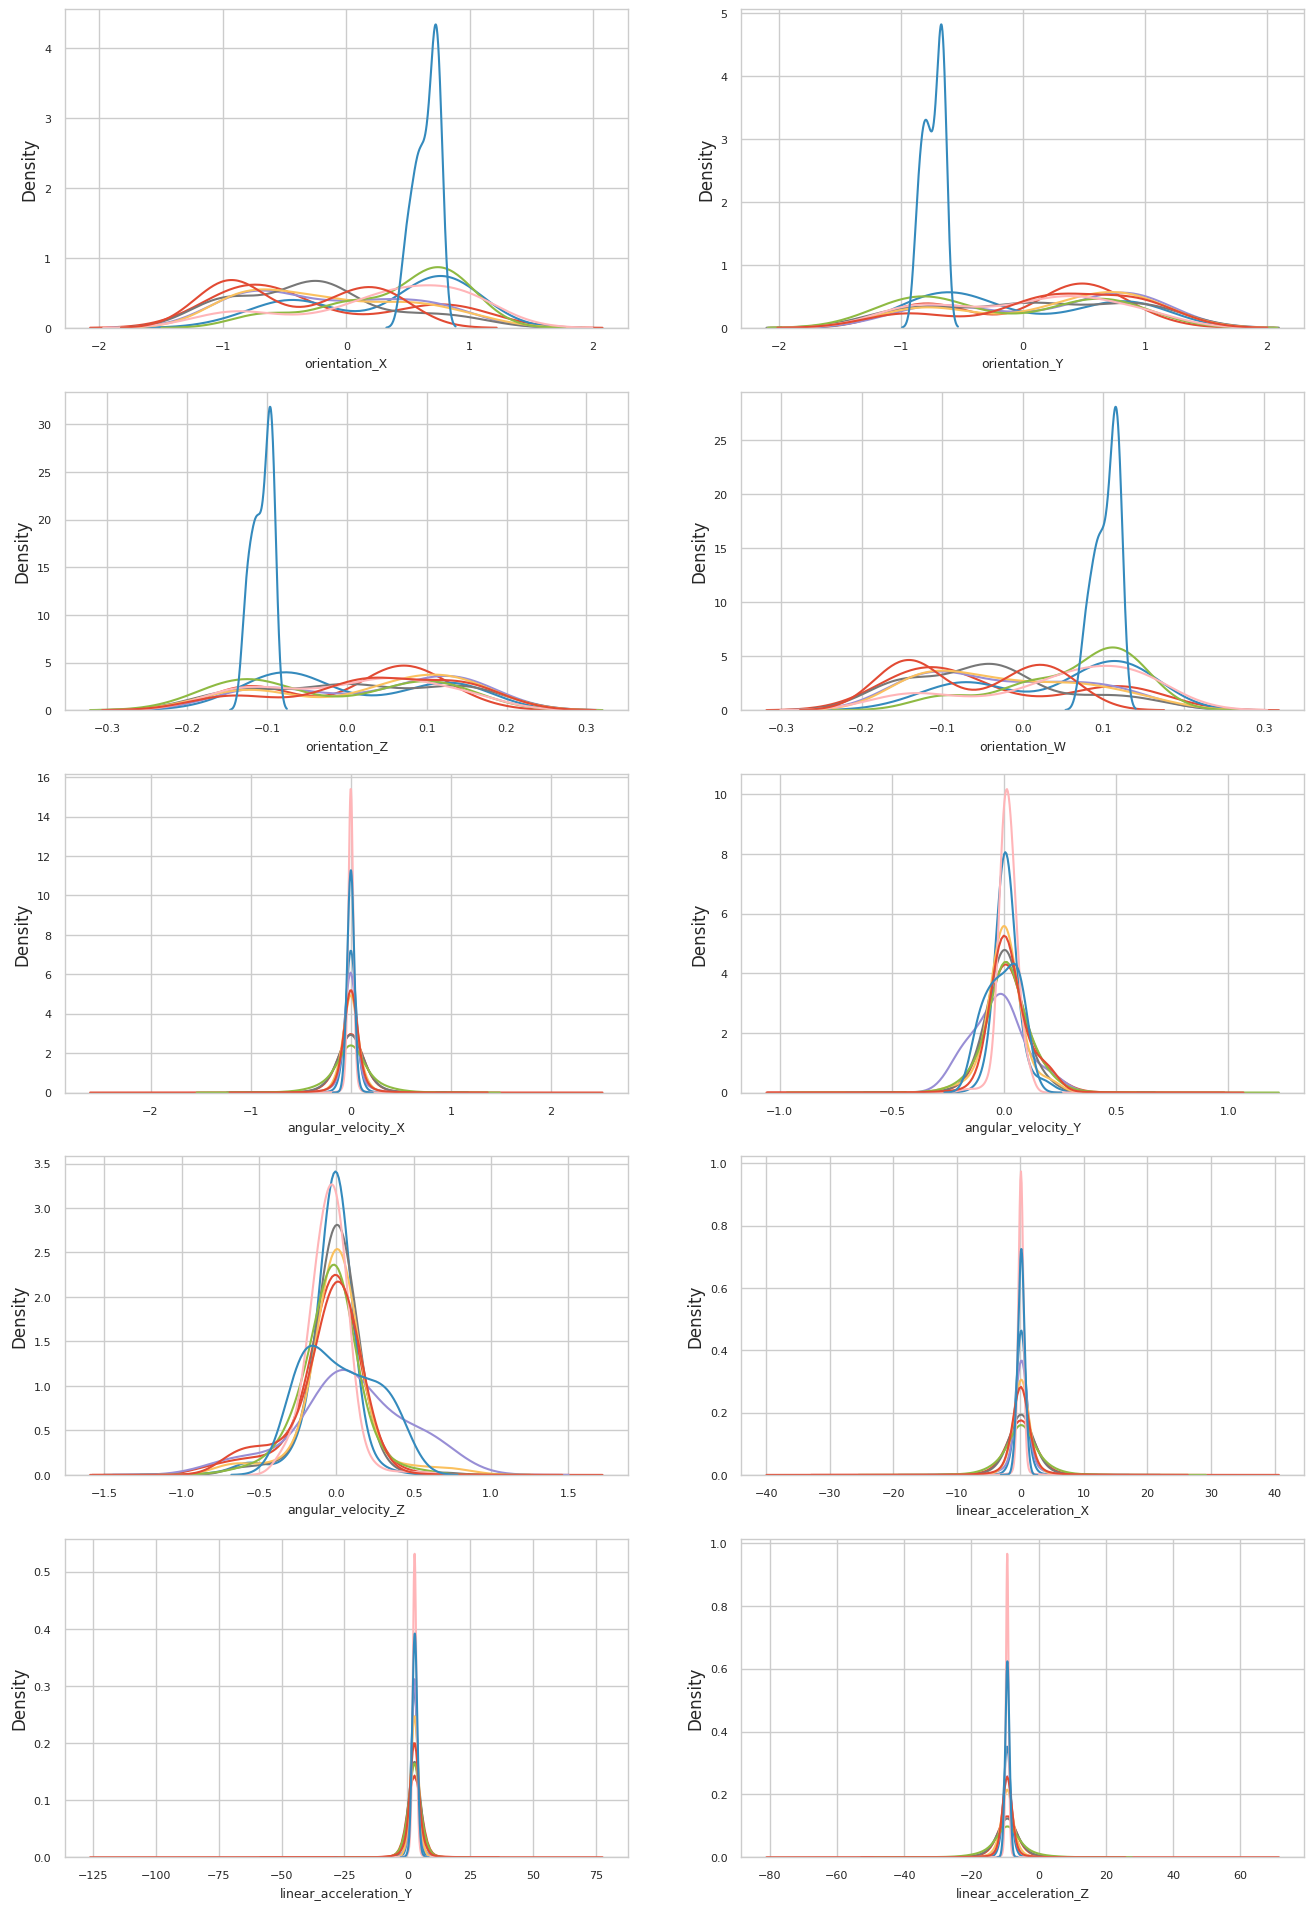

In [38]:
classes = (target['surface'].value_counts()).index
aux = data.merge(target, on='series_id', how='inner')
plot_feature_class_distribution(classes, aux, features)

Normal distribution

Knowing this differences and that variables follow a normal distribution (in most of the cases) we need to add new features like: mean, std, median, range ... (for each variable).

new scale

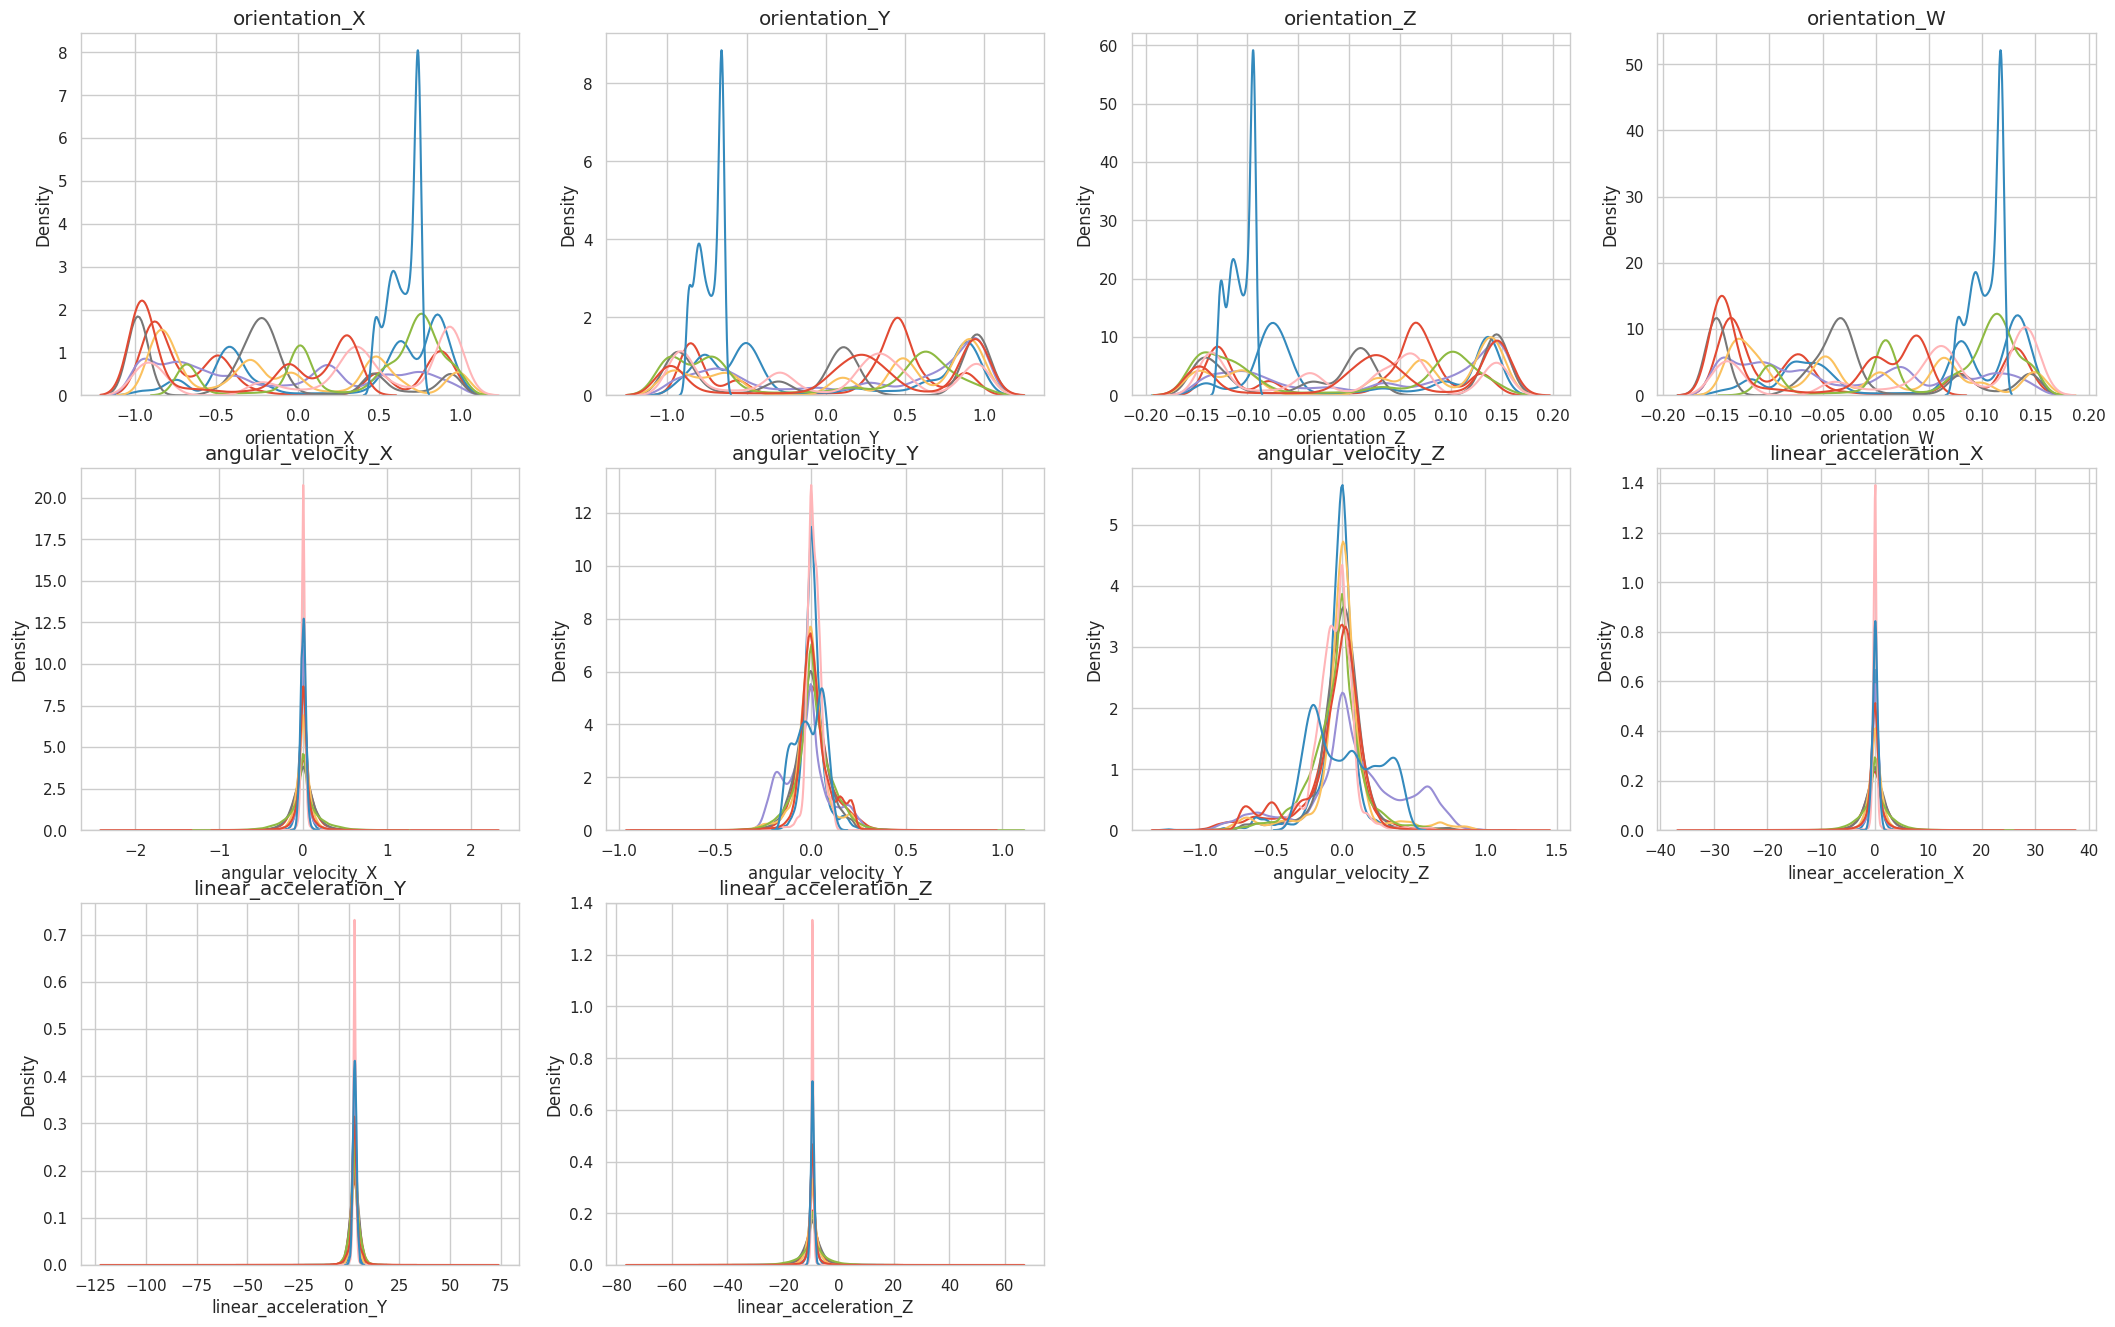

In [39]:
plt.figure(figsize=(26, 16))
for i,col in enumerate(aux.columns[3:13]):
    ax = plt.subplot(3,4,i+1)
    ax = plt.title(col)
    for surface in classes:
        surface_feature = aux[aux['surface'] == surface]
        sns.kdeplot(surface_feature[col], label = surface)

Histogram for main features

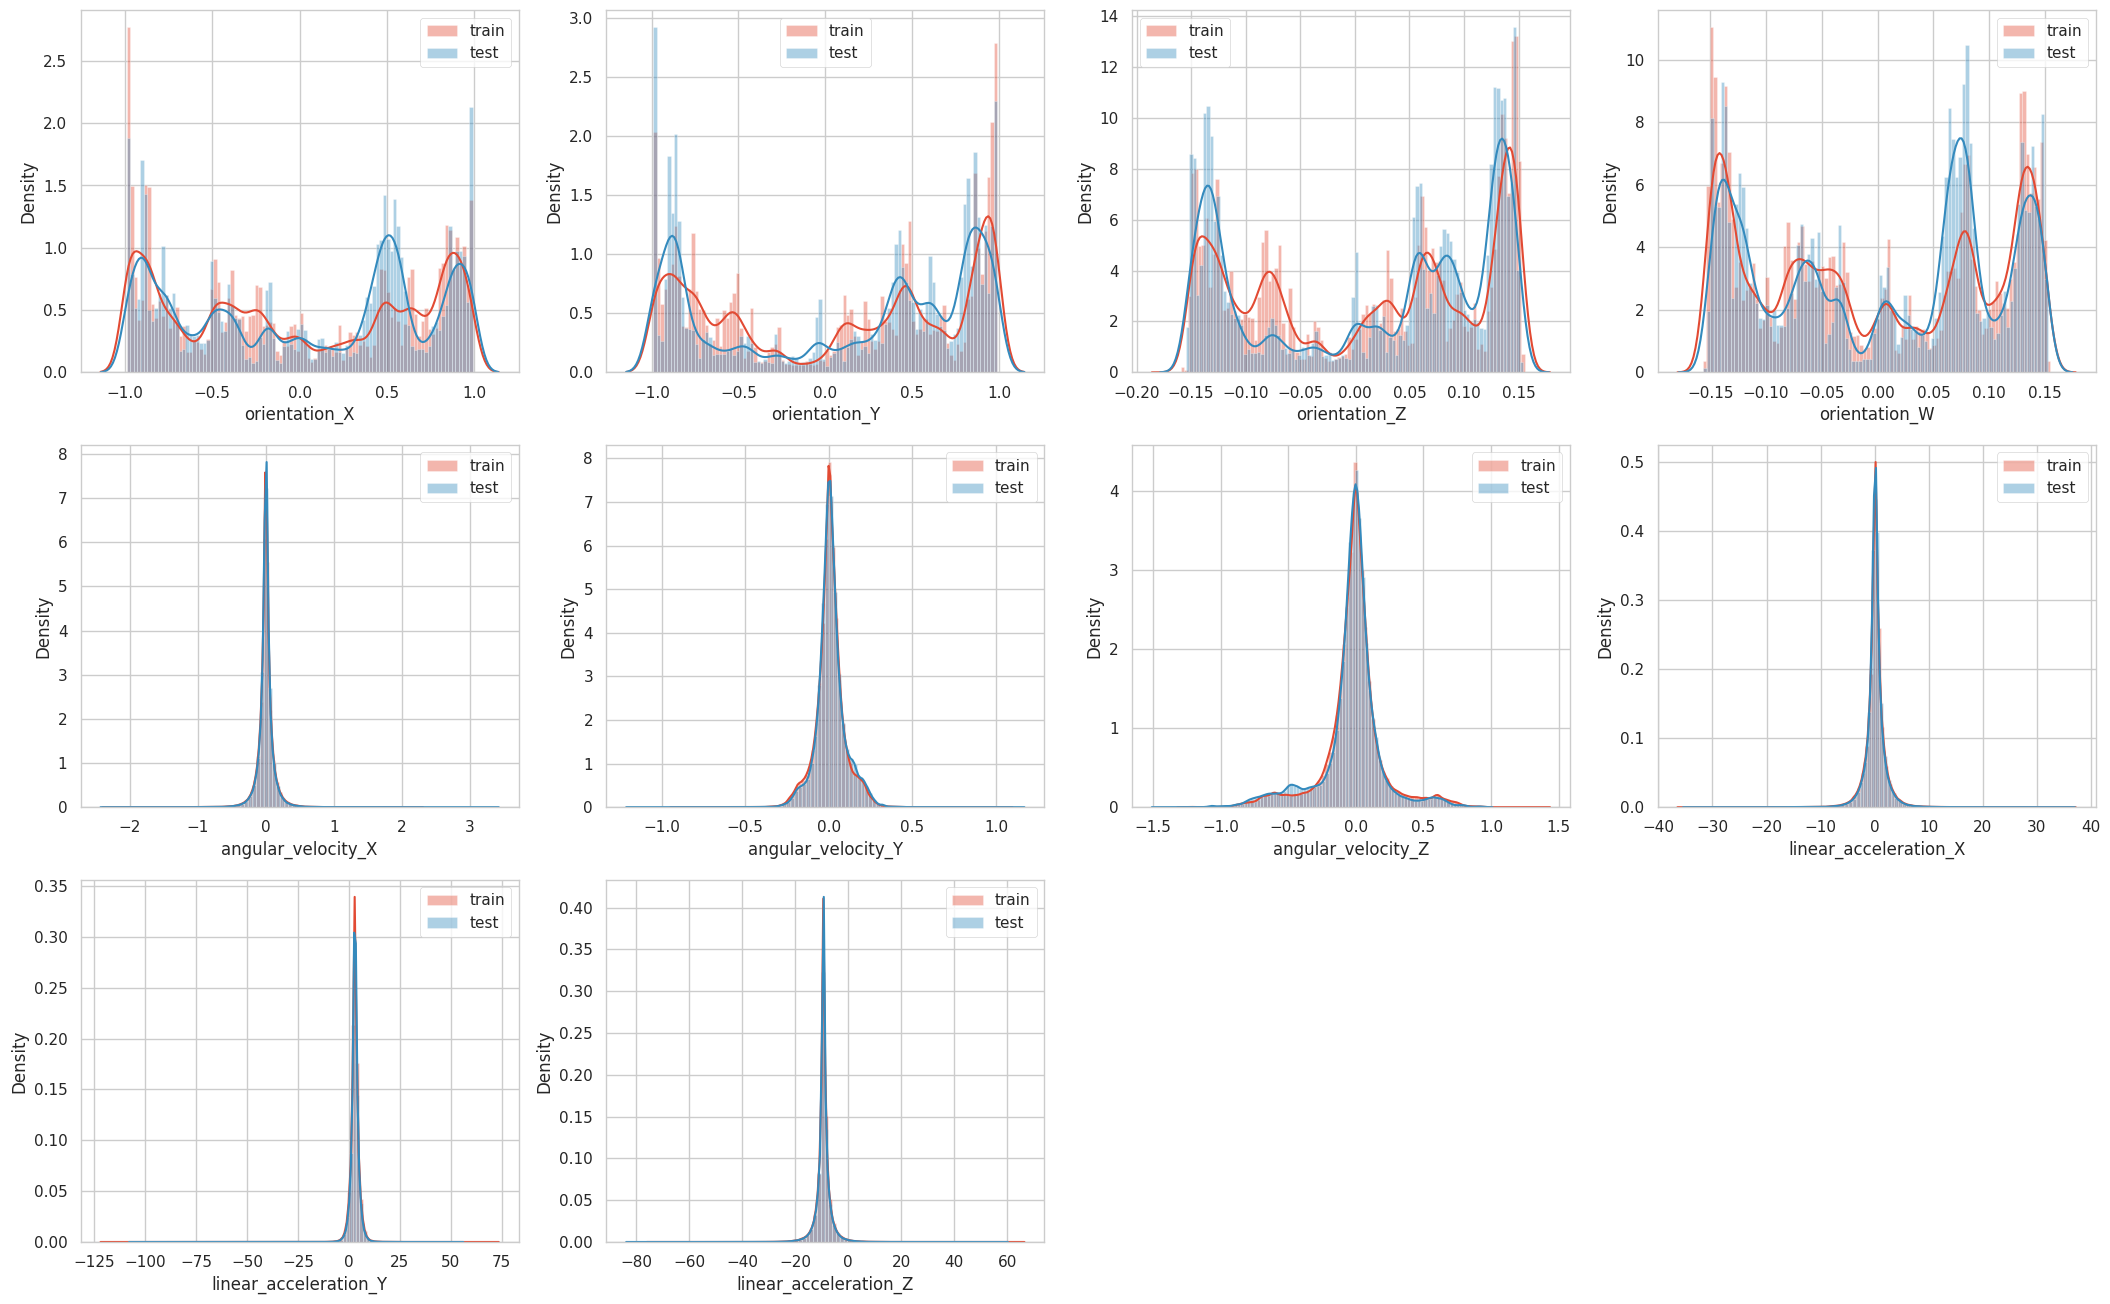

In [40]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(data.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.distplot(data[col], bins=100, label='train')
    sns.distplot(test[col], bins=100, label='test')
    ax.legend()   

Quaternions

In [41]:
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.atan2(t3, t4)

    return X, Y, Z

it's better to do normalization to avoid precision issues

In [42]:
def fe_step0 (actual):
    actual['norm_quat'] = (actual['orientation_X']**2 + actual['orientation_Y']**2 + actual['orientation_Z']**2 + actual['orientation_W']**2)
    actual['mod_quat'] = (actual['norm_quat'])**0.5
    actual['norm_X'] = actual['orientation_X'] / actual['mod_quat']
    actual['norm_Y'] = actual['orientation_Y'] / actual['mod_quat']
    actual['norm_Z'] = actual['orientation_Z'] / actual['mod_quat']
    actual['norm_W'] = actual['orientation_W'] / actual['mod_quat']
    
    return actual

In [43]:
data = fe_step0(data)
test = fe_step0(test)
print(data.shape)
data.head()

(487680, 19)


row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            0.000767               -0.74857                 2.1030   
1            0.003386                0.33995                 1.5064   
2           -0.005978               -0.26429                 1.5922   
3           -0.008974                0.42684                 1.0993   
4            0.005245               -0.50969                 1.4689   

   linear_acceleration_Z  norm_quat  mod_quat    norm_X    norm_Y   norm_Z  \
0                -9.7532   0.999997  0.999999 -0.758531 -0.634351 -0.10488   
1                -9.4128   0.999995  0.999998 -0.758532 -0.634342 -0.10490   
2                -8.7267   1.000006  1.000003 -0.758528 -0.634348 -0.10492   
3               -10.0960   1.000009  1.000005 -0.758516 -0.634357 -0.10495   
4               -10.4410   0.999995  0.999997 -0.758522 -0.634352 -0.10495   

    norm_W  
0 -0.10597  
1 -0.10600  
2 -0.10597  
3 -0.10597  
4 -0.10596

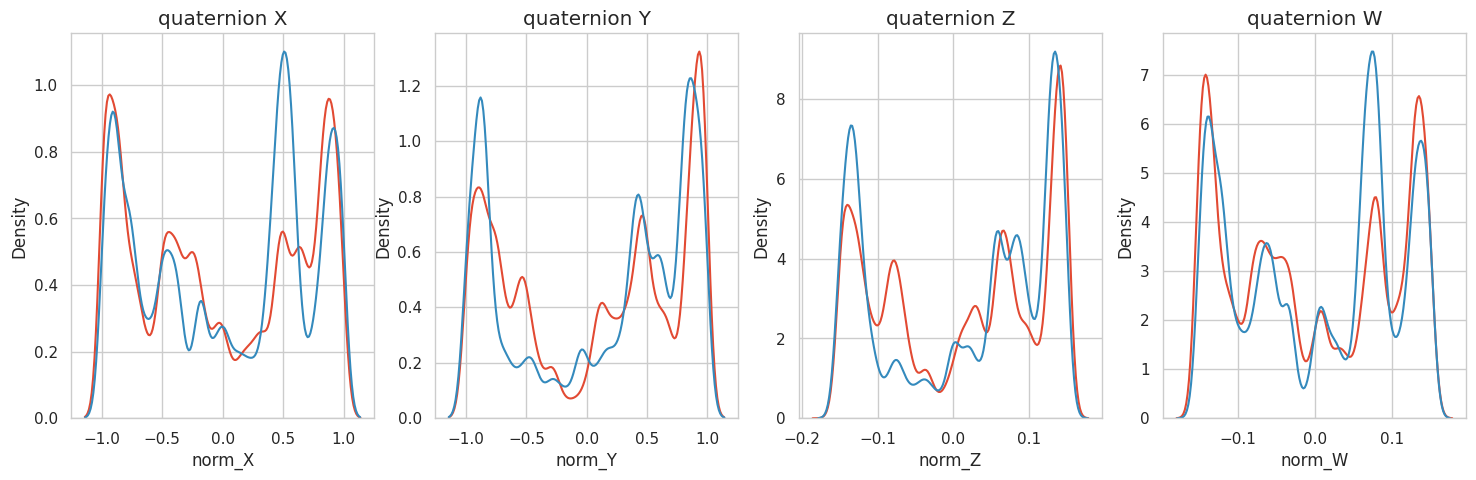

In [44]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18, 5))

ax1.set_title('quaternion X')
sns.kdeplot(data['norm_X'], ax=ax1, label="train")
sns.kdeplot(test['norm_X'], ax=ax1, label="test")

ax2.set_title('quaternion Y')
sns.kdeplot(data['norm_Y'], ax=ax2, label="train")
sns.kdeplot(test['norm_Y'], ax=ax2, label="test")

ax3.set_title('quaternion Z')
sns.kdeplot(data['norm_Z'], ax=ax3, label="train")
sns.kdeplot(test['norm_Z'], ax=ax3, label="test")

ax4.set_title('quaternion W')
sns.kdeplot(data['norm_W'], ax=ax4, label="train")
sns.kdeplot(test['norm_W'], ax=ax4, label="test")

plt.show()

(x, y, z, w) -> (x,y,z) quaternions to euler angles

In [45]:
def fe_step1 (actual):
    
    x, y, z, w = actual['norm_X'].tolist(), actual['norm_Y'].tolist(), actual['norm_Z'].tolist(), actual['norm_W'].tolist()
    nx, ny, nz = [], [], []
    for i in range(len(x)):
        xx, yy, zz = quaternion_to_euler(x[i], y[i], z[i], w[i])
        nx.append(xx)
        ny.append(yy)
        nz.append(zz)
    
    actual['euler_x'] = nx
    actual['euler_y'] = ny
    actual['euler_z'] = nz
    return actual

In [46]:
data = fe_step1(data)
test = fe_step1(test)
print (data.shape)
data.head()

(487680, 22)


row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  ...  linear_acceleration_Z  norm_quat  mod_quat  \
0            0.000767  ...                -9.7532   0.999997  0.999999   
1            0.003386  ...                -9.4128   0.999995  0.999998   
2           -0.005978  ...                -8.7267   1.000006  1.000003   
3           -0.008974  ...               -10.0960   1.000009  1.000005   
4            0.005245  ...               -10.4410   0.999995  0.999997   

     norm_X    norm_Y   norm_Z   norm_W   euler_x   euler_y   euler_z  
0 -0.758531 -0.634351 -0.10488 -0.10597  2.843273 -0.024668  1.396667  
1 -0.758532 -0.634342 -0.10490 -0.10600  2.843201 -0.024662  1.396651  
2 -0.758528 -0.634348 -0.10492 -0.10597  2.843222 -0.024728  1.396677  
3 -0.758516 -0.634357 -0.10495 -0.10597  2.843183 -0.024769  1.396712  
4 -0.758522 -0.634352 -0.10495 -0.10596  2.843197 -0.024785  1.396698  

[5 rows x 22 columns]

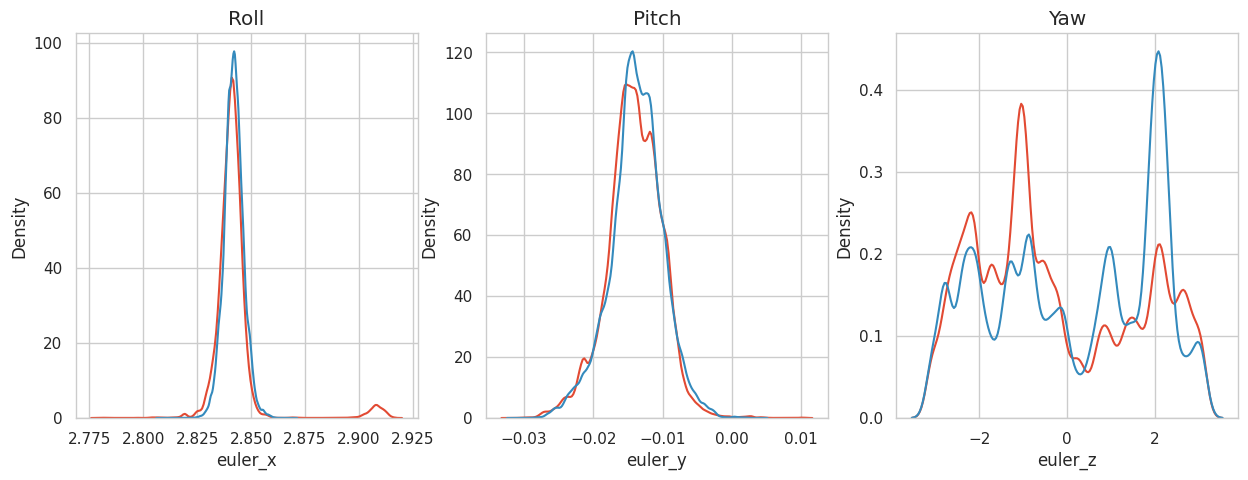

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

ax1.set_title('Roll')
sns.kdeplot(data['euler_x'], ax=ax1, label="train")
sns.kdeplot(test['euler_x'], ax=ax1, label="test")

ax2.set_title('Pitch')
sns.kdeplot(data['euler_y'], ax=ax2, label="train")
sns.kdeplot(test['euler_y'], ax=ax2, label="test")

ax3.set_title('Yaw')
sns.kdeplot(data['euler_z'], ax=ax3, label="train")
sns.kdeplot(test['euler_z'], ax=ax3, label="test")

plt.show()

Why Orientation_Z (euler angle Z) is so important?
* We have a robot moving around, imagine a robot moving straight through different surfaces (each with different features), for example concrete and hard tile floor. Our robot can can bounce or balance itself a little bit on if the surface is not flat and smooth, that's why we need to work with quaternions and take care of orientation_Z.

Basic features

In [48]:
def feat_eng(data):
    
    df = pd.DataFrame()
    data['totl_anglr_vel'] = (data['angular_velocity_X']**2 + data['angular_velocity_Y']**2 + data['angular_velocity_Z']**2)** 0.5
    data['totl_linr_acc'] = (data['linear_acceleration_X']**2 + data['linear_acceleration_Y']**2 + data['linear_acceleration_Z']**2)**0.5
    data['totl_xyz'] = (data['orientation_X']**2 + data['orientation_Y']**2 + data['orientation_Z']**2)**0.5
    data['acc_vs_vel'] = data['totl_linr_acc'] / data['totl_anglr_vel']
    
    def mean_change_of_abs_change(x):
        return np.mean(np.diff(np.abs(np.diff(x))))
    
    for col in data.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        df[col + '_mean'] = data.groupby(['series_id'])[col].mean()
        df[col + '_median'] = data.groupby(['series_id'])[col].median()
        df[col + '_max'] = data.groupby(['series_id'])[col].max()
        df[col + '_min'] = data.groupby(['series_id'])[col].min()
        df[col + '_std'] = data.groupby(['series_id'])[col].std()
        df[col + '_range'] = df[col + '_max'] - df[col + '_min']
        df[col + '_maxtoMin'] = df[col + '_max'] / df[col + '_min']
        df[col + '_mean_abs_chg'] = data.groupby(['series_id'])[col].apply(lambda x: np.mean(np.abs(np.diff(x))))
        df[col + '_mean_change_of_abs_change'] = data.groupby('series_id')[col].apply(mean_change_of_abs_change)
        df[col + '_abs_max'] = data.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        df[col + '_abs_min'] = data.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        df[col + '_abs_avg'] = (df[col + '_abs_min'] + df[col + '_abs_max'])/2
    return df

In [49]:
%%time
data = feat_eng(data)
test = feat_eng(test)
print ("New features: ",data.shape)

New features:  (3810, 276)
CPU times: user 1min 21s, sys: 7.95 ms, total: 1min 21s
Wall time: 1min 21s


In [50]:
data.head()

orientation_X_mean  orientation_X_median  orientation_X_max  \
series_id                                                                
0                   -0.758666             -0.758530           -0.75822   
1                   -0.958606             -0.958595           -0.95837   
2                   -0.512057             -0.512035           -0.50944   
3                   -0.939169             -0.939170           -0.93884   
4                   -0.891301             -0.890940           -0.88673   

           orientation_X_min  orientation_X_std  orientation_X_range  \
series_id                                                              
0                   -0.75953           0.000363              0.00131   
1                   -0.95896           0.000151              0.00059   
2                   -0.51434           0.001377              0.00490   
3                   -0.93968           0.000227              0.00084   
4                   -0.89689           0.002955              0.01016   

           orientation_X_maxtoMin  orientation_X_mean_abs_chg  \
series_id                                                       
0                        0.998275                    0.000015   
1                        0.999385                    0.000023   
2                        0.990473                    0.000041   
3                        0.999106                    0.000026   
4                        0.988672                    0.000080   

           orientation_X_mean_change_of_abs_change  orientation_X_abs_max  \
series_id                                                                   
0                                     2.380952e-07                0.75953   
1                                    -4.761905e-07                0.95896   
2                                     0.000000e+00                0.51434   
3                                    -6.349206e-07                0.93968   
4                                     7.936508e-08                0.89689   

           ...  acc_vs_vel_max  acc_vs_vel_min  acc_vs_vel_std  \
series_id  ...                                                   
0          ...      995.561076       56.133014      135.641510   
1          ...      611.826712       32.938319       88.488750   
2          ...      904.269577       52.834789      132.789650   
3          ...      805.924410       11.305069      112.264757   
4          ...      111.588333       39.895232       16.611029   

           acc_vs_vel_range  acc_vs_vel_maxtoMin  acc_vs_vel_mean_abs_chg  \
series_id                                                                   
0                939.428062            17.735749               114.896199   
1                578.888393            18.574922                57.943094   
2                851.434788            17.115041                83.878164   
3                794.619341            71.288762                76.773215   
4                 71.693101             2.797034                 5.618844   

           acc_vs_vel_mean_change_of_abs_change  acc_vs_vel_abs_max  \
series_id                                                             
0                                      1.309785          995.561076   
1                                      0.508448          611.826712   
2                                     -0.078679          904.269577   
3                                      0.928182          805.924410   
4                                     -0.003968          111.588333   

           acc_vs_vel_abs_min  acc_vs_vel_abs_avg  
series_id                                          
0                   56.133014          525.847045  
1                   32.938319          322.382516  
2                   52.834789          478.552183  
3                   11.305069          408.614740  
4                   39.895232           75.741783  

[5 rows x 276 columns]

New advanced features

In [51]:
from scipy.stats import kurtosis
from scipy.stats import skew

def _kurtosis(x):
    return kurtosis(x)

def CPT5(x):
    den = len(x)*np.exp(np.std(x))
    return sum(np.exp(x))/den

def skewness(x):
    return skew(x)

def SSC(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1 
    xn_i1 = x[0:len(x)-2]  # xn-1
    ans = np.heaviside((xn-xn_i1)*(xn-xn_i2),0)
    return sum(ans[1:]) 

def wave_length(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1 
    return sum(abs(xn_i2-xn))
    
def norm_entropy(x):
    tresh = 3
    return sum(np.power(abs(x),tresh))

def SRAV(x):    
    SRA = sum(np.sqrt(abs(x)))
    return np.power(SRA/len(x),2)

def mean_abs(x):
    return sum(abs(x))/len(x)

def zero_crossing(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1
    return sum(np.heaviside(-xn*xn_i2,0))

This advanced features based on robust statistics.

In [52]:
def fe_advanced_stats(data):
    
    df = pd.DataFrame()
    
    for col in data.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        if 'orientation' in col:
            continue
            
        print ("FE on column ", col, "...")
        
        df[col + '_skew'] = data.groupby(['series_id'])[col].skew()
        df[col + '_mad'] = data.groupby(['series_id'])[col].mad()
        df[col + '_q25'] = data.groupby(['series_id'])[col].quantile(0.25)
        df[col + '_q75'] = data.groupby(['series_id'])[col].quantile(0.75)
        df[col + '_q95'] = data.groupby(['series_id'])[col].quantile(0.95)
        df[col + '_iqr'] = df[col + '_q75'] - df[col + '_q25']
        df[col + '_CPT5'] = data.groupby(['series_id'])[col].apply(CPT5) 
        df[col + '_SSC'] = data.groupby(['series_id'])[col].apply(SSC) 
        df[col + '_skewness'] = data.groupby(['series_id'])[col].apply(skewness)
        df[col + '_wave_lenght'] = data.groupby(['series_id'])[col].apply(wave_length)
        df[col + '_norm_entropy'] = data.groupby(['series_id'])[col].apply(norm_entropy)
        df[col + '_SRAV'] = data.groupby(['series_id'])[col].apply(SRAV)
        df[col + '_kurtosis'] = data.groupby(['series_id'])[col].apply(_kurtosis) 
        df[col + '_zero_crossing'] = data.groupby(['series_id'])[col].apply(zero_crossing) 
        
    return df

* Frequency of the max value
* Frequency of the min value
* Count Positive values
* Count Negative values
* Count zeros

In [53]:
basic_fe = ['linear_acceleration_X','linear_acceleration_Y','linear_acceleration_Z',
           'angular_velocity_X','angular_velocity_Y','angular_velocity_Z']

In [54]:
def fe_plus (data):
    
    aux = pd.DataFrame()
    
    for serie in data.index:
        #if serie%500 == 0: print ("> Serie = ",serie)
        
        aux = X_train[X_train['series_id']==serie]
        
        for col in basic_fe:
            data.loc[serie,col + '_unq'] = aux[col].round(3).nunique()
            data.loc[serie,col + 'ratio_unq'] = aux[col].round(3).nunique()/18
            try:
                data.loc[serie,col + '_freq'] = aux[col].value_counts().idxmax()
            except:
                data.loc[serie,col + '_freq'] = 0
            
            data.loc[serie,col + '_max_freq'] = aux[aux[col] == aux[col].max()].shape[0]
            data.loc[serie,col + '_min_freq'] = aux[aux[col] == aux[col].min()].shape[0]
            data.loc[serie,col + '_pos_freq'] = aux[aux[col] >= 0].shape[0]
            data.loc[serie,col + '_neg_freq'] = aux[aux[col] < 0].shape[0]
            data.loc[serie,col + '_nzeros'] = (aux[col]==0).sum(axis=0)


Correlation (2)

In [55]:
#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
corr_matrix = data.corr().abs()
raw_corr = data.corr()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                 .stack()
                 .sort_values(ascending=False))
top_corr = pd.DataFrame(sol).reset_index()
top_corr.columns = ["var1", "var2", "abs corr"]
# with .abs() we lost the sign, and it's very important.
for x in range(len(top_corr)):
    var1 = top_corr.iloc[x]["var1"]
    var2 = top_corr.iloc[x]["var2"]
    corr = raw_corr[var1][var2]
    top_corr.at[x, "raw corr"] = corr

In [56]:
top_corr.head(15)

var1                    var2  abs corr  raw corr
0        norm_quat_max            mod_quat_max       1.0       1.0
1        norm_quat_max        mod_quat_abs_max       1.0       1.0
2    norm_quat_abs_max            mod_quat_max       1.0       1.0
3    norm_quat_abs_max        mod_quat_abs_max       1.0       1.0
4     norm_quat_median         mod_quat_median       1.0       1.0
5    norm_quat_abs_min            mod_quat_min       1.0       1.0
6        norm_quat_min        mod_quat_abs_min       1.0       1.0
7    norm_quat_abs_min        mod_quat_abs_min       1.0       1.0
8        norm_quat_min            mod_quat_min       1.0       1.0
9         totl_xyz_max        totl_xyz_abs_max       1.0       1.0
10   totl_linr_acc_min   totl_linr_acc_abs_min       1.0       1.0
11         euler_x_min         euler_x_abs_min       1.0       1.0
12  totl_anglr_vel_max  totl_anglr_vel_abs_max       1.0       1.0
13  totl_anglr_vel_min  totl_anglr_vel_abs_min       1.0       1.0
14        totl_xyz_min        totl_xyz_abs_min       1.0       1.0

Filling missing NAs and infinite data ∞ by zeroes 0

In [57]:
data.fillna(0,inplace=True)
test.fillna(0,inplace=True)
data.replace(-np.inf,0,inplace=True)
data.replace(np.inf,0,inplace=True)
test.replace(-np.inf,0,inplace=True)
test.replace(np.inf,0,inplace=True)

Label encoding

In [58]:
target.head()

series_id  group_id        surface
0          0        13  fine_concrete
1          1        31       concrete
2          2        20       concrete
3          3        31       concrete
4          4        22     soft_tiles

In [59]:
target['surface'] = le.fit_transform(target['surface'])

In [60]:
target['surface'].value_counts()

surface
1    779
5    732
8    607
7    514
2    363
4    308
6    297
0    189
3     21
Name: count, dtype: int64

In [61]:
target.head()

series_id  group_id  surface
0          0        13        2
1          1        31        1
2          2        20        1
3          3        31        1
4          4        22        6

Run Model

use random_state at Random Forest

if don't use random_state will get a different solution everytime, sometimes will be lucky, but other times will lose time comparing.

Validation Strategy: Stratified KFold

In [62]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=59)

In [71]:
predicted = np.zeros((test.shape[0],9))
measured= np.zeros((data.shape[0]))
score = 0

Fold: 0 score: 0.8976377952755905
Fold: 1 score: 0.9422572178477691


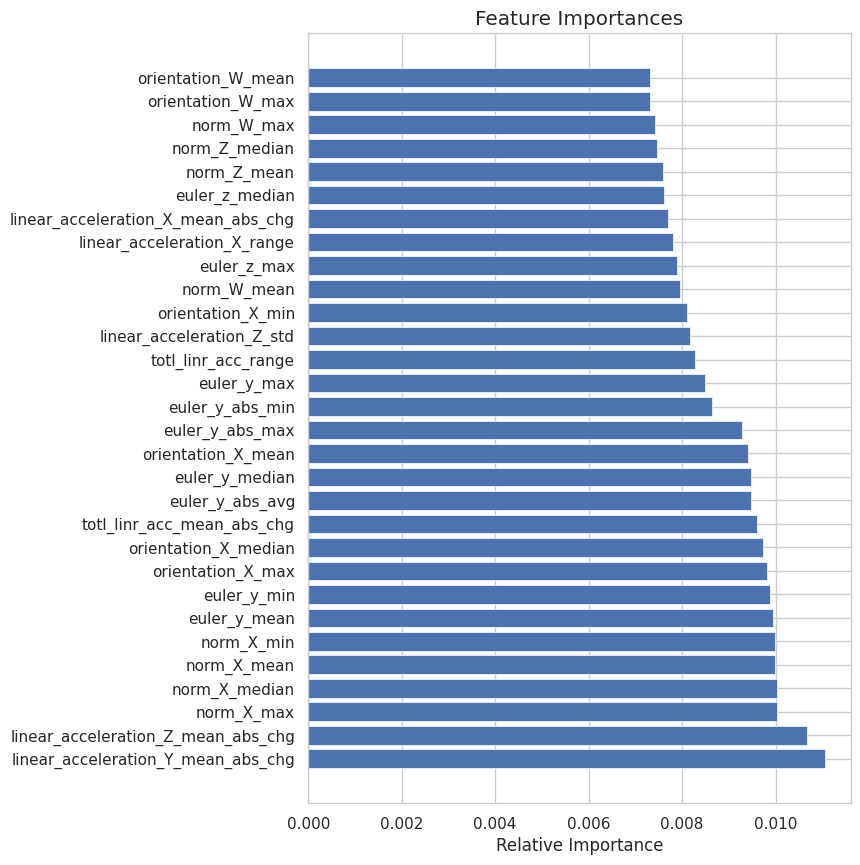

Fold: 2 score: 0.9291338582677166


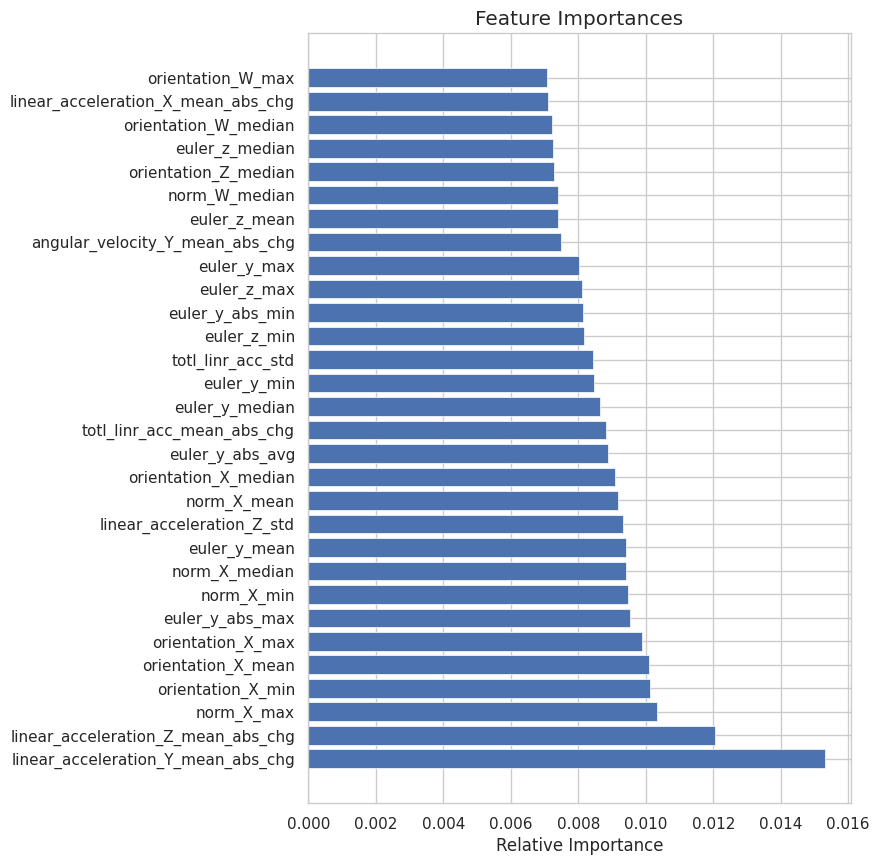

Fold: 3 score: 0.8976377952755905
Fold: 4 score: 0.9081364829396326
Fold: 5 score: 0.9028871391076115
Fold: 6 score: 0.8923884514435696
Fold: 7 score: 0.916010498687664
Fold: 8 score: 0.9422572178477691


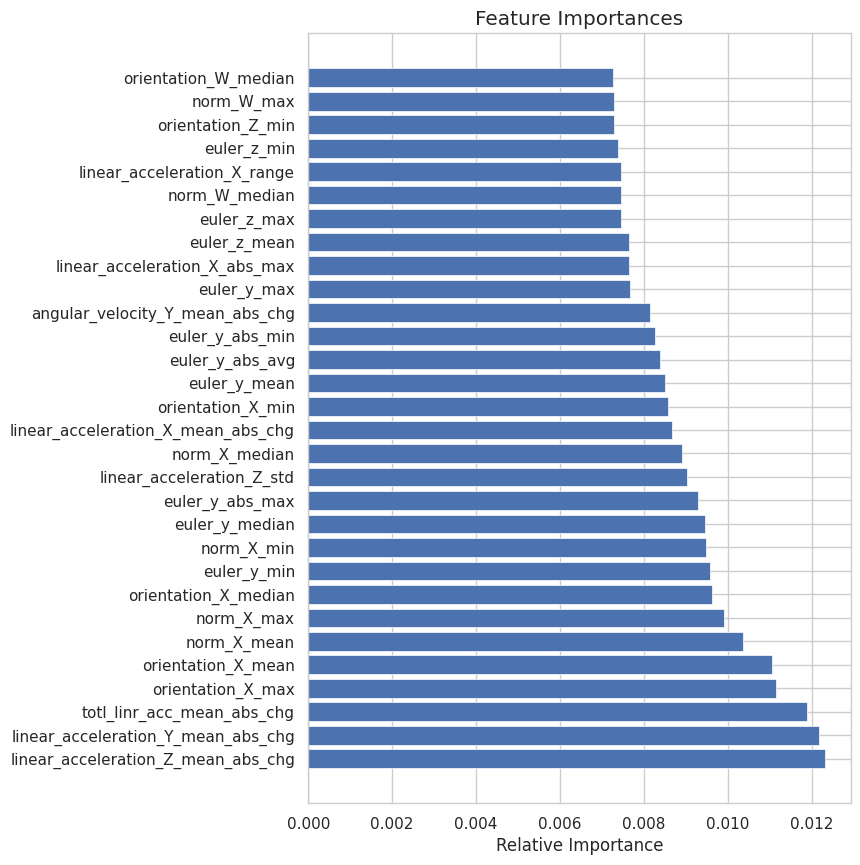

Fold: 9 score: 0.9212598425196851


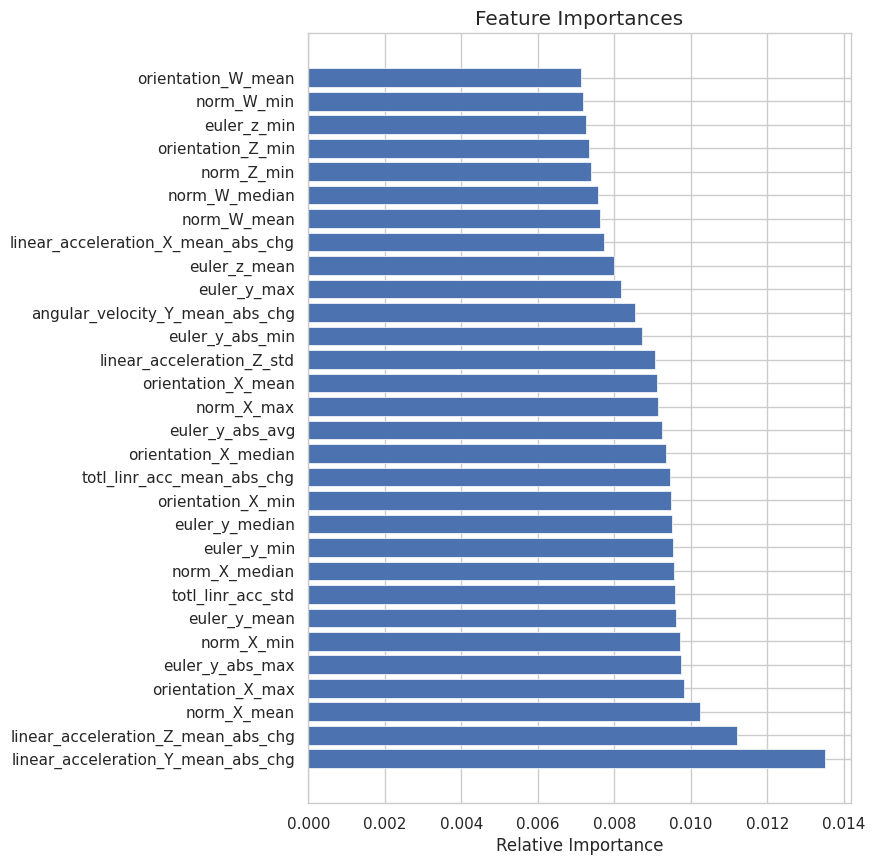

In [72]:
for times, (trn_idx, val_idx) in enumerate(folds.split(data.values,target['surface'].values)):
    model = RandomForestClassifier(n_estimators=500, n_jobs = -1)
    #model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, n_jobs=-1)
    model.fit(data.iloc[trn_idx], target['surface'][trn_idx])
    measured[val_idx] = model.predict(data.iloc[val_idx])
    predicted += model.predict_proba(test) / folds.n_splits
    score += model.score(data.iloc[val_idx], target['surface'][val_idx])
    print("Fold: {} score: {}".format(times, model.score(data.iloc[val_idx], target['surface'][val_idx])))

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort indices by feature importance in descending order
    features = data.columns

    if model.score(data.iloc[val_idx], target['surface'][val_idx]) > 0.92000:
        hm = 30
        plt.figure(figsize=(7, 10))
        plt.title('Feature Importances')
        plt.barh(range(hm), importances[indices][:hm], color='b', align='center')
        plt.yticks(range(hm), [features[i] for i in indices[:hm]])
        plt.xlabel('Relative Importance')
        plt.show()

    gc.collect()

In [73]:
print(score)

9.1496062992126


In [74]:
print('Avg Accuracy RF', score / folds.n_splits)

Avg Accuracy RF 0.91496062992126


In [75]:
confusion_matrix(measured,target['surface'])

array([[162,   4,   0,   0,   2,   3,   0,   4,   0],
       [ 14, 713,  13,   0,  11,  15,   6,  13,  12],
       [  0,   3, 310,   0,   3,   1,   0,   0,   5],
       [  0,   0,   0,  12,   0,   0,   0,   0,   0],
       [  0,  10,   1,   0, 285,   4,   0,   3,   1],
       [  3,  14,   8,   1,   1, 696,   3,   9,  16],
       [  0,  11,   3,   2,   0,   1, 283,   3,   1],
       [  2,   2,   5,   0,   0,   3,   0, 472,  19],
       [  8,  22,  23,   6,   6,   9,   5,  10, 553]])

Confusion Matrix Plot

In [76]:
def plot_confusion_matrix(truth, pred, classes, normalize=False, title=''):
    cm = confusion_matrix(truth, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()

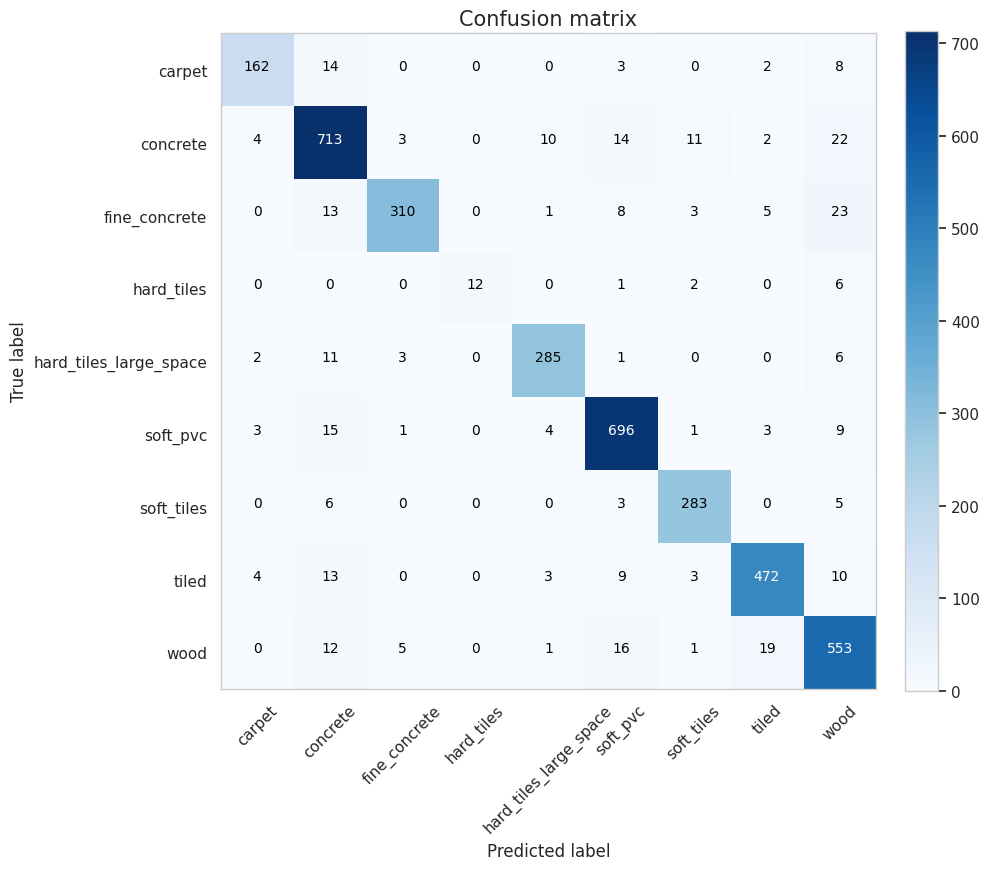

In [77]:
plot_confusion_matrix(target['surface'], measured, le.classes_)

In [78]:
sub['surface'] = le.inverse_transform(predicted.argmax(axis=1))
sub.to_csv('submission.csv', index=False)
sub.head()

series_id   surface
0          0  soft_pvc
1          1      wood
2          2  concrete
3          3      wood
4          4  concrete

Generate a new train and test: Fast Fourier Transform Denoising

In [79]:
from numpy.fft import *
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('ggplot')

In [81]:
X_train = pd.read_csv('/kaggle/input/career-con-2019/X_train.csv')
X_test = pd.read_csv('/kaggle/input/career-con-2019/X_test.csv')
target = pd.read_csv('/kaggle/input/career-con-2019/y_train.csv')

In [82]:
series_dict = {}
for series in (X_train['series_id'].unique()):
    series_dict[series] = X_train[X_train['series_id'] == series] 

In [83]:
def plotSeries(series_id):
    style.use('ggplot')
    plt.figure(figsize=(28, 16))
    print(target[target['series_id'] == series_id]['surface'].values[0].title())
    for i, col in enumerate(series_dict[series_id].columns[3:]):
        if col.startswith("o"):
            color = 'red'
        elif col.startswith("a"):
            color = 'green'
        else:
            color = 'blue'
        if i >= 7:
            i+=1
        plt.subplot(3, 4, i + 1)
        plt.plot(series_dict[series_id][col], color=color, linewidth=3)
        plt.title(col)

Concrete


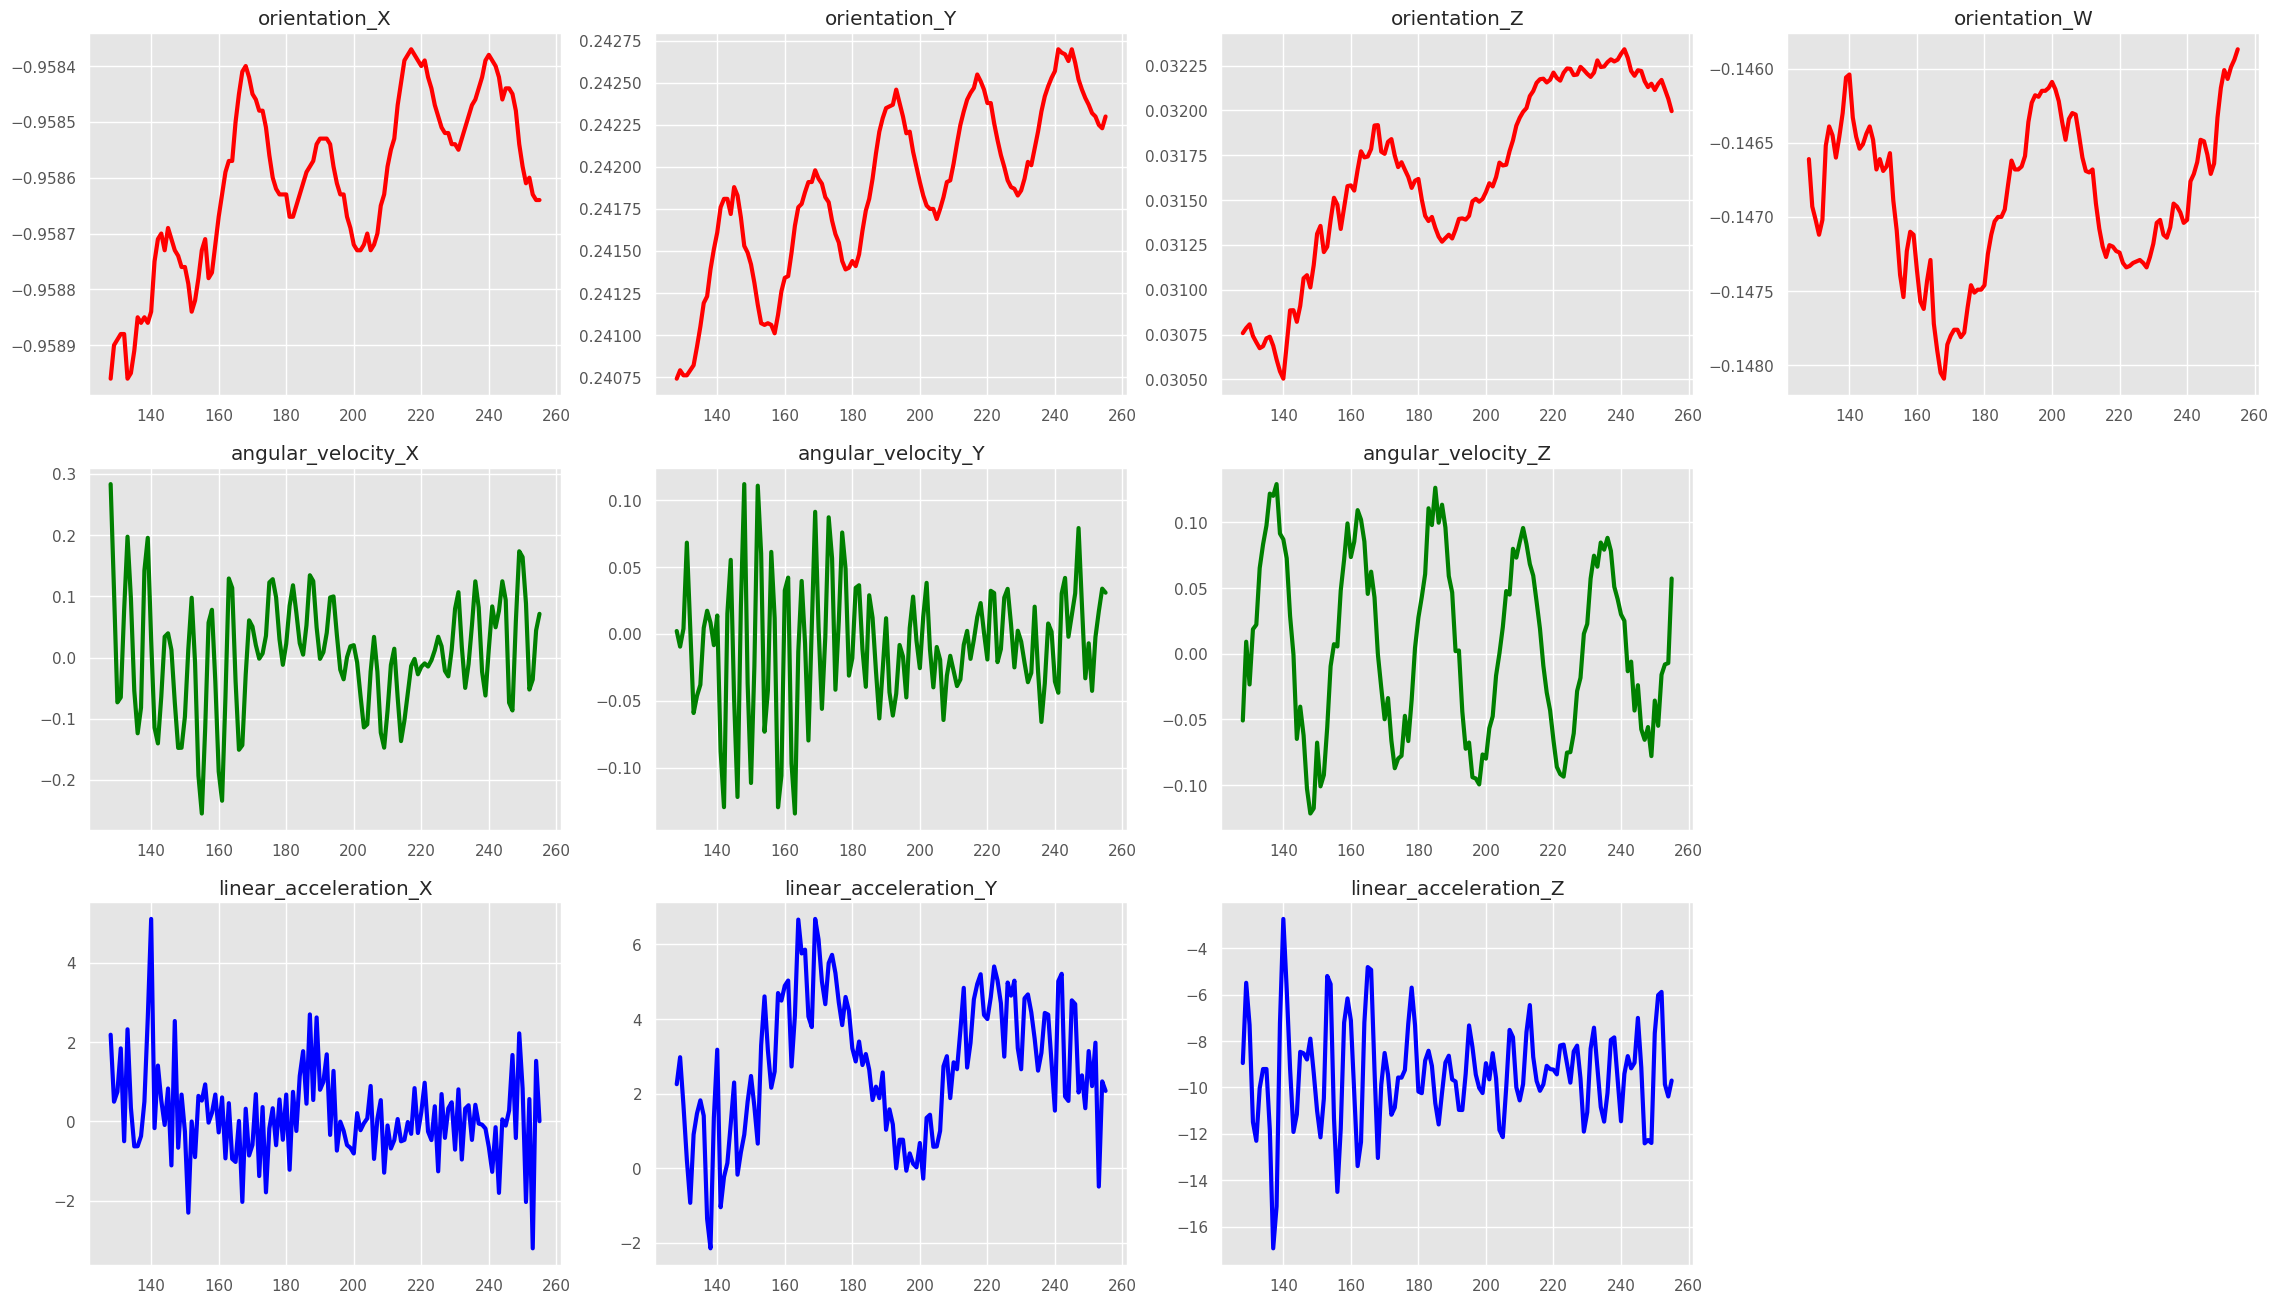

In [84]:
plotSeries(1)

In [85]:
def filter_signal(signal, threshold=1e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [86]:
X_train_denoised = X_train.copy()
X_test_denoised = X_test.copy()

# train
for col in X_train.columns:
    if col[0:3] == 'ang' or col[0:3] == 'lin':
        # Apply filter_signal function to the data in each series
        denoised_data = X_train.groupby(['series_id'])[col].apply(lambda x: filter_signal(x))
        
        # Assign the denoised data back to X_train
        list_denoised_data = []
        for arr in denoised_data:
            for val in arr:
                list_denoised_data.append(val)
                
        X_train_denoised[col] = list_denoised_data
        
# test
for col in X_test.columns:
    if col[0:3] == 'ang' or col[0:3] == 'lin':
        # Apply filter_signal function to the data in each series
        denoised_data = X_test.groupby(['series_id'])[col].apply(lambda x: filter_signal(x))
        
        # Assign the denoised data back to X_train
        list_denoised_data = []
        for arr in denoised_data:
            for val in arr:
                list_denoised_data.append(val)
                
        X_test_denoised[col] = list_denoised_data


In [87]:
series_dict = {}
for series in (X_train_denoised['series_id'].unique()):
    series_dict[series] = X_train_denoised[X_train_denoised['series_id'] == series] 

Concrete


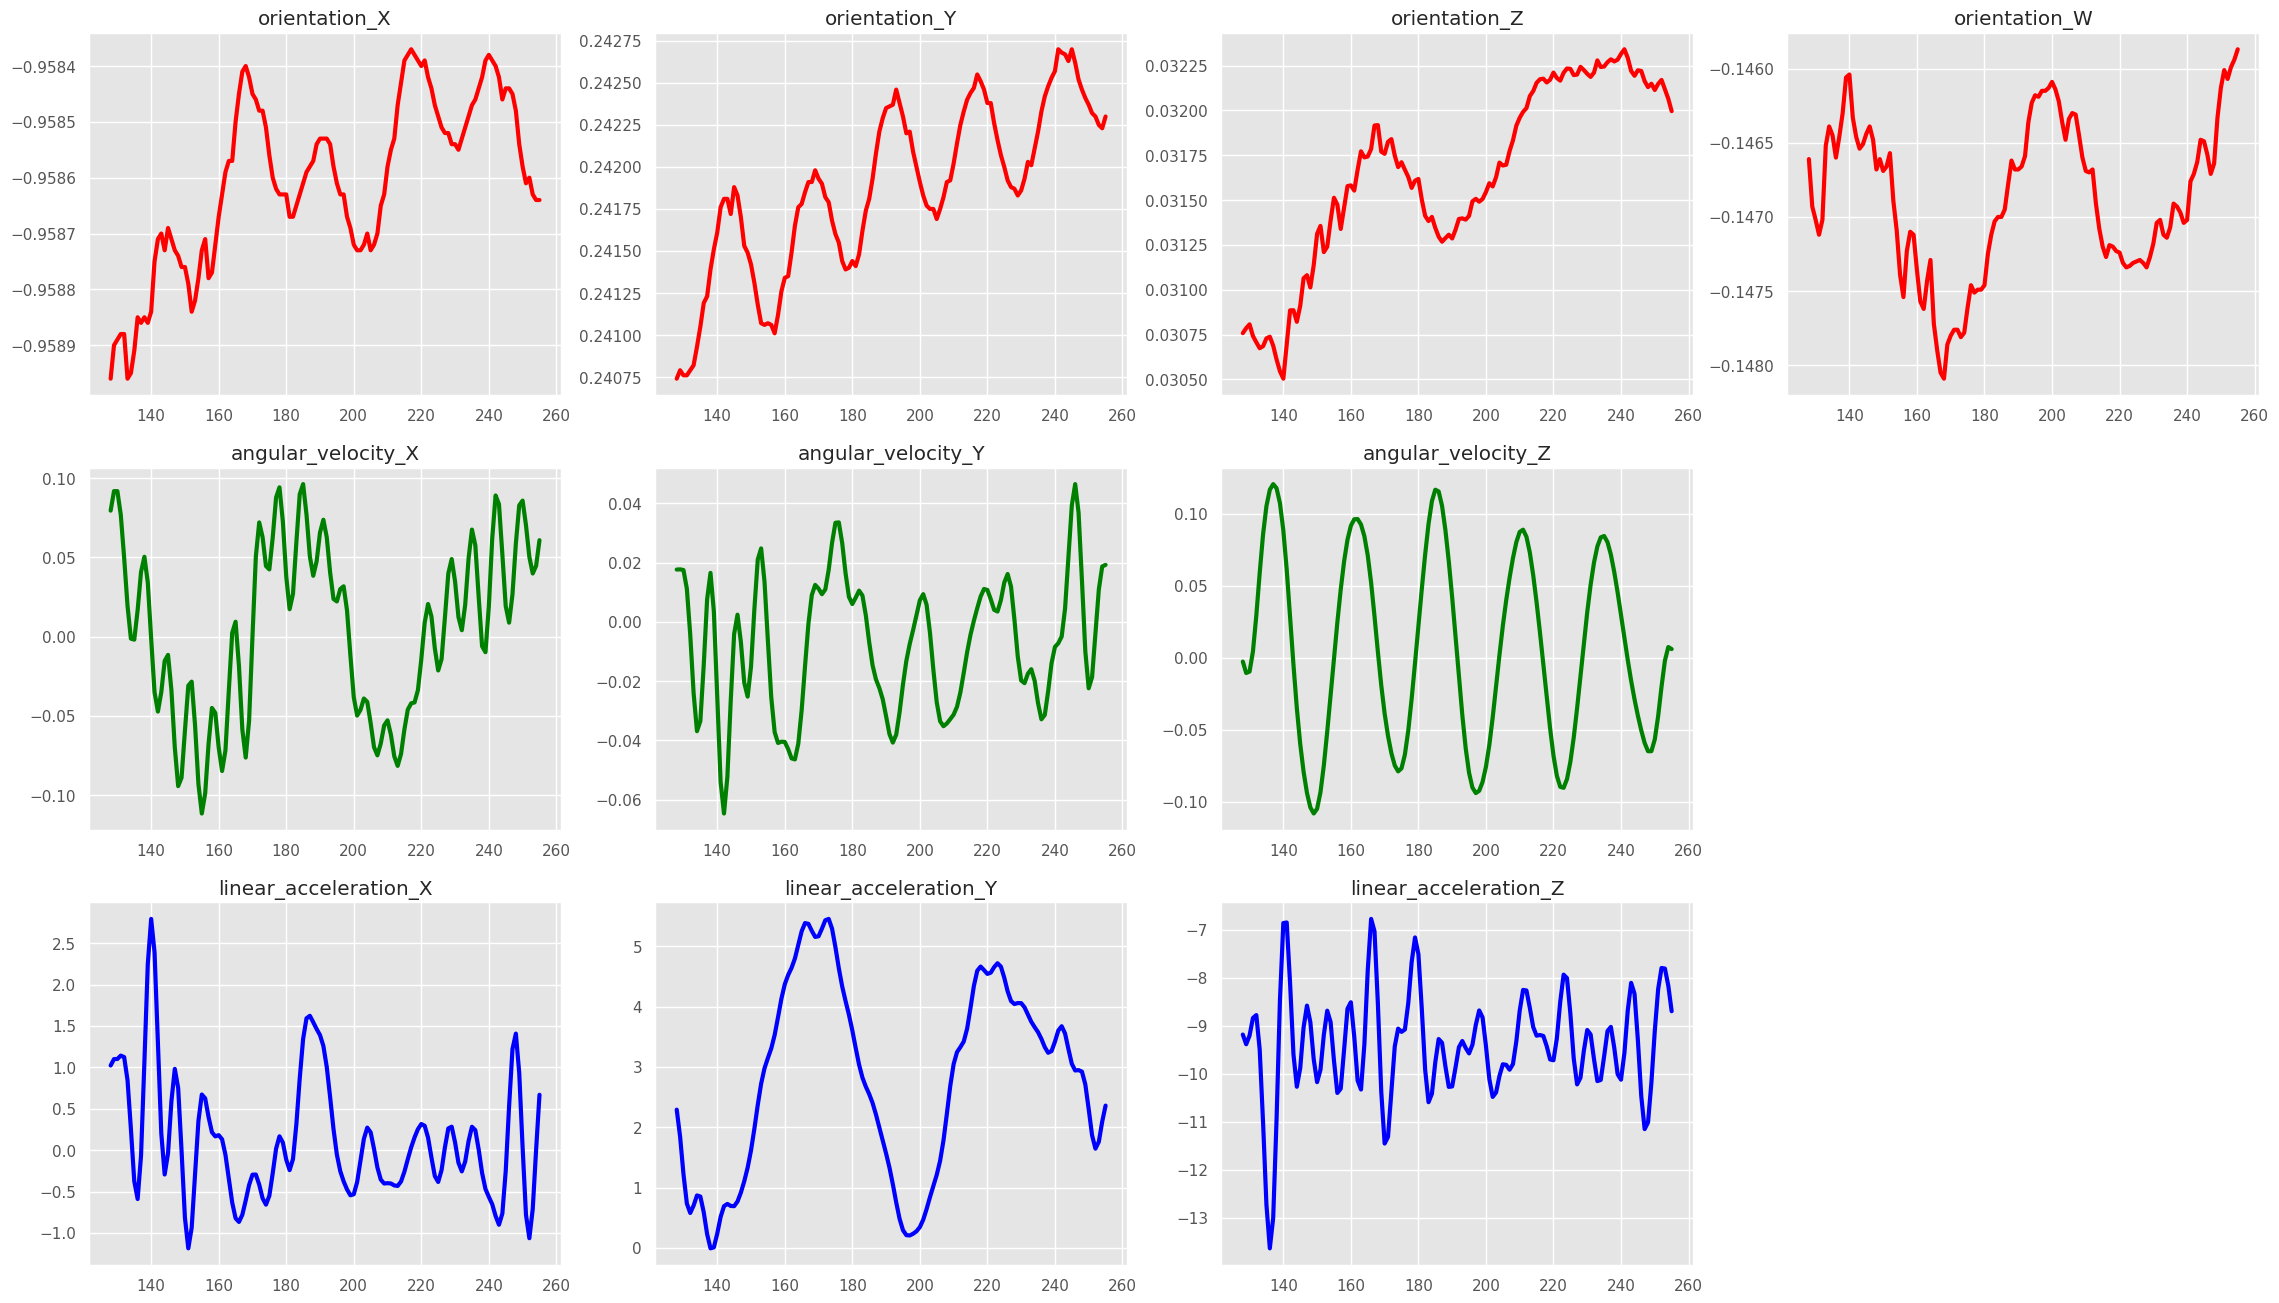

In [88]:
plotSeries(1)

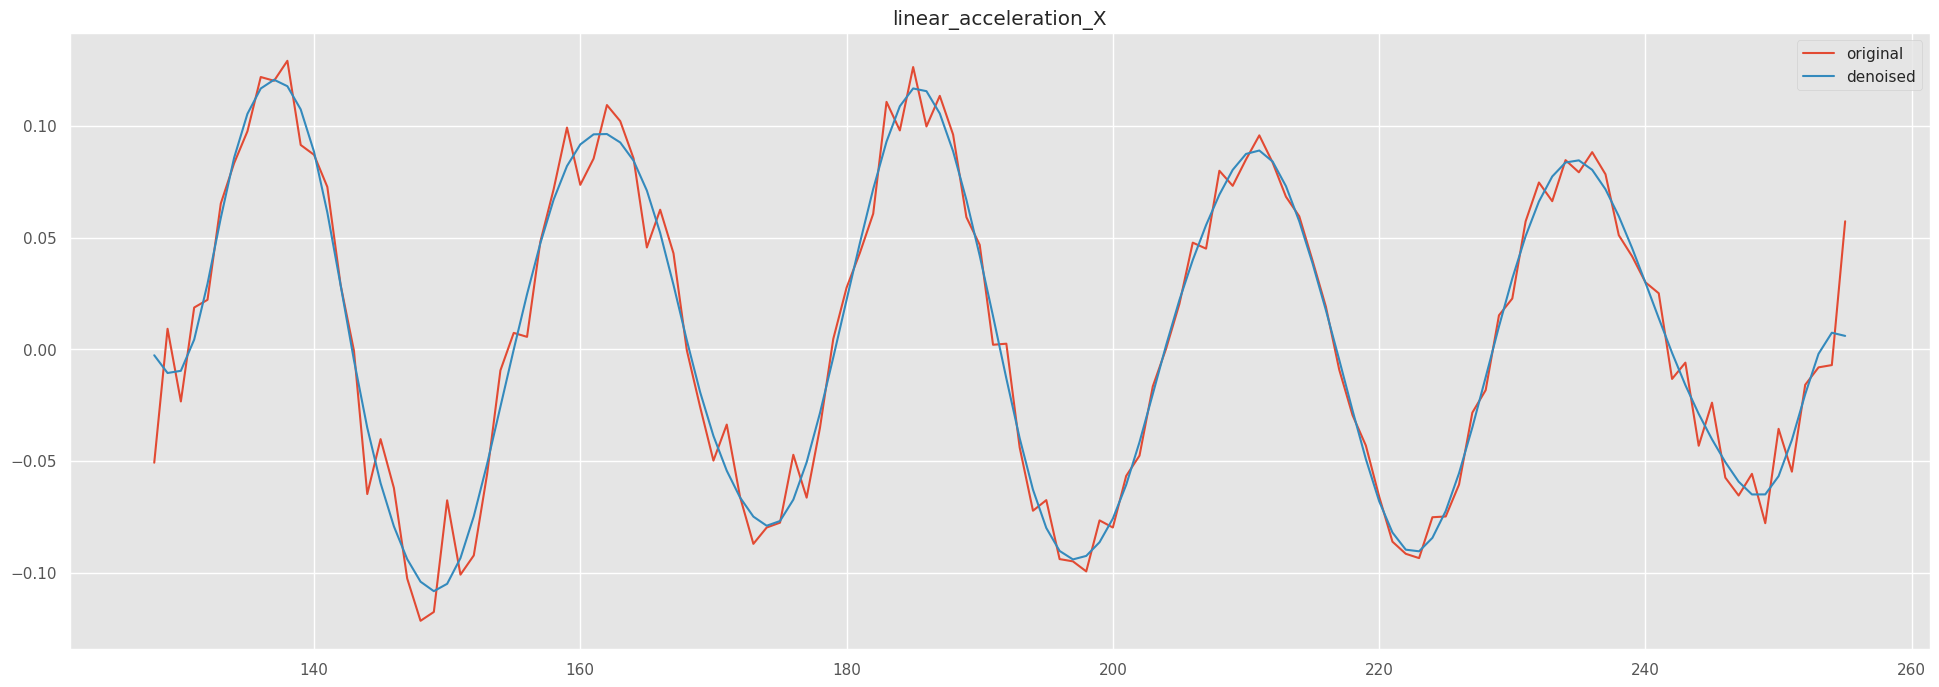

In [89]:
plt.figure(figsize=(24, 8))
plt.title('linear_acceleration_X')
plt.plot(X_train.angular_velocity_Z[128:256], label="original");
plt.plot(X_train_denoised.angular_velocity_Z[128:256], label="denoised");
plt.legend()
plt.show()

In [90]:
X_train_denoised.head()

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.064074            0.017639   
1       -0.10490       -0.10600            0.055530            0.026568   
2       -0.10492       -0.10597            0.033545            0.026603   
3       -0.10495       -0.10597            0.020209            0.020964   
4       -0.10495       -0.10596            0.025990            0.016635   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            0.005879              -0.347098               1.298076   
1           -0.000263              -0.096578               1.477298   
2           -0.003403               0.020569               1.574134   
3           -0.004373              -0.048217               1.502748   
4           -0.005075              -0.221169               1.268350   

   linear_acceleration_Z  
0             -10.220717  
1              -9.775386  
2              -9.616280  
3              -9.772827  
4              -9.925467

In [91]:
X_test_denoised.head()

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0        0.91208       -0.38193   
1    0_1          0                   1        0.91220       -0.38165   
2    0_2          0                   2        0.91228       -0.38143   
3    0_3          0                   3        0.91237       -0.38121   
4    0_4          0                   4        0.91247       -0.38096   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0      -0.050618        0.14028           -0.036495            0.077891   
1      -0.050573        0.14028           -0.029362            0.055145   
2      -0.050586        0.14032           -0.031141            0.045657   
3      -0.050588        0.14035           -0.041663            0.049893   
4      -0.050546        0.14042           -0.053458            0.061239   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0           -0.216680               0.126973               3.290738   
1           -0.191907               0.047670               2.858572   
2           -0.180110              -0.165445               2.649131   
3           -0.182313              -0.393724               2.691842   
4           -0.192786              -0.529179               2.898734   

   linear_acceleration_Z  
0              -9.490571  
1              -9.501242  
2              -9.195254  
3              -8.864413  
4              -8.797598

In [92]:
X_train_denoised.to_csv('test_denoised.csv', index=False)
X_test_denoised.to_csv('train_denoised.csv', index=False)